In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sb
import os
import wget

In [3]:
df = pd.read_csv('hospital-beds.csv')

In [4]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

X                         18
Y                         18
HQ_ADDRESS1             6253
COUNTY_NAME               25
STATE_NAME                25
STATE_FIPS                25
CNTY_FIPS                 25
FIPS                      25
NUM_LICENSED_BEDS        148
NUM_STAFFED_BEDS         236
PEDI_ICU_BEDS            737
BED_UTILIZATION          711
AVG_VENTILATOR_USAGE      75
dtype: int64

In [5]:
beds_df = df.dropna(subset=['BED_UTILIZATION'])

In [6]:
beds_columns = beds_df.columns[beds_df.isnull().any()]
beds_df[beds_columns].isnull().sum()

X                         13
Y                         13
HQ_ADDRESS1             5589
COUNTY_NAME               18
STATE_NAME                18
STATE_FIPS                18
CNTY_FIPS                 18
FIPS                      18
PEDI_ICU_BEDS             43
AVG_VENTILATOR_USAGE      11
dtype: int64

In [7]:
beds_df.dropna(subset=['FIPS'], inplace=True)

C:\Users\josyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
beds_df.HQ_ADDRESS1.fillna('', inplace=True)

C:\Users\josyu\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:
beds_df.PEDI_ICU_BEDS.fillna(0, inplace=True)

In [11]:
beds_df.AVG_VENTILATOR_USAGE.fillna(0.0, inplace=True)

In [12]:
beds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 9 to 6591
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                5892 non-null   float64
 1   Y                                5892 non-null   float64
 2   OBJECTID                         5892 non-null   int64  
 3   HOSPITAL_NAME                    5892 non-null   object 
 4   HOSPITAL_TYPE                    5892 non-null   object 
 5   HQ_ADDRESS                       5892 non-null   object 
 6   HQ_ADDRESS1                      5892 non-null   object 
 7   HQ_CITY                          5892 non-null   object 
 8   HQ_STATE                         5892 non-null   object 
 9   HQ_ZIP_CODE                      5892 non-null   int64  
 10  COUNTY_NAME                      5892 non-null   object 
 11  STATE_NAME                       5892 non-null   object 
 12  STATE_FIPS          

In [127]:
os.system("wget https://www.ers.usda.gov/webdocs/DataFiles/48747/PovertyEstimates.xls -O usda_poverty.xls")

1

In [129]:
poverty_lvl_url = 'https://www.ers.usda.gov/webdocs/DataFiles/48747/PovertyEstimates.xls'
wget.download(poverty_lvl_url, 'usda_poverty.xls')

100% [............................................................................] 983552 / 983552

'usda_poverty.xls'

In [15]:
usda_povery_df = pd.read_excel('usda_poverty.xls', sheet_name="Poverty Data 2018", skiprows=4)

In [18]:
usda_povery_df.rename(columns={"FIPStxt": "FIPS"}, inplace=True)

In [19]:
us_poverty_df = usda_povery_df[['FIPS', 'PCTPOVALL_2018']]

In [23]:
beds_df[['FIPS', 'BED_UTILIZATION']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 9 to 6591
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FIPS             5892 non-null   float64
 1   BED_UTILIZATION  5892 non-null   float64
dtypes: float64(2)
memory usage: 138.1 KB


In [24]:
beds_df[['FIPS', 'STATE_FIPS', 'CNTY_FIPS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5892 entries, 9 to 6591
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FIPS        5892 non-null   float64
 1   STATE_FIPS  5892 non-null   float64
 2   CNTY_FIPS   5892 non-null   float64
dtypes: float64(3)
memory usage: 184.1 KB


In [25]:
beds_df[['STATE_FIPS', 'CNTY_FIPS', 'FIPS']] = beds_df[['STATE_FIPS', 'CNTY_FIPS', 'FIPS']].astype('int64')

C:\Users\josyu\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
#Merged Master DataFrame
beds_poverty_df = beds_df.merge(us_poverty_df, on='FIPS')

In [32]:
beds_poverty_df['PCTBED_UTILIZATION'] = beds_poverty_df[['BED_UTILIZATION']]*100

In [29]:
beds_poverty_df.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018
0,-90.105308,32.325487,10,Merit Health River Oaks (FKA River Oaks Hospit...,Short Term Acute Care Hospital,1030 River Oaks Dr,,Flowood,MS,39232,...,28121,160.0,160.0,10,10,20.0,0.279868,0,2.0,9.6
1,-90.101250,32.329541,2122,Merit Health Womans Hospital (FKA Womans Hospi...,Short Term Acute Care Hospital,1026 N Flowood Dr,,Flowood,MS,39232,...,28121,109.0,34.0,16,16,16.0,0.254714,75,1.0,9.6
2,-90.034841,32.286473,2155,Merit Health Rankin (FKA Crossgates River Oaks...,Short Term Acute Care Hospital,350 Crossgates Blvd,,Brandon,MS,39042,...,28121,134.0,114.0,8,8,0.0,0.137900,20,2.0,9.6
3,-90.071900,32.235500,2156,Whitfield Medical Surgical Hospital,Short Term Acute Care Hospital,3550 Highway 468 W,Bldg 60,Whitfield,MS,39193,...,28121,43.0,32.0,6,6,0.0,0.102397,11,0.0,9.6
4,-89.754900,32.377843,2158,Scott Regional Hospital (AKA Scott Regional Me...,Critical Access Hospital,317 Highway 13 S,,Morton,MS,39117,...,28121,25.0,25.0,4,4,0.0,0.335562,0,0.0,9.6


In [56]:
beds_poverty_df['HOSPITAL_TYPE'].unique()

array(['Short Term Acute Care Hospital', 'Critical Access Hospital',
       'Psychiatric Hospital', 'Long Term Acute Care Hospital',
       'Rehabilitation Hospital', 'Childrens Hospital',
       'Religious Non-Medical Health Care Institution'], dtype=object)

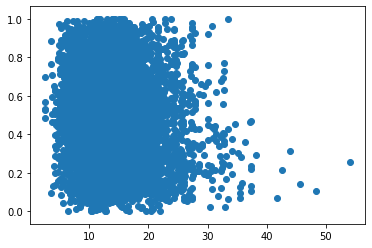

In [57]:
plt.scatter(data = beds_poverty_df, x = 'PCTPOVALL_2018', y = 'BED_UTILIZATION')

In [58]:
beds_poverty_df[['PCTPOVALL_2018', 'BED_UTILIZATION']].describe()

,PCTPOVALL_2018,BED_UTILIZATION
count,5849.000000,5849.000000
mean,14.245392,0.491357
std,5.268514,0.235749
min,2.600000,0.000721
25%,10.600000,0.299330
50%,13.800000,0.496767
75%,16.800000,0.677041
max,54.000000,1.000000


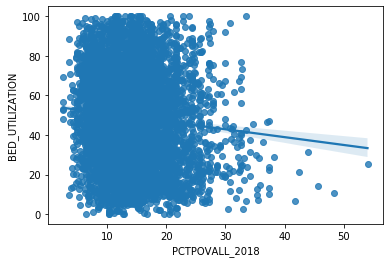

In [61]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
sb.regplot(beds_poverty_df['PCTPOVALL_2018'], beds_poverty_df['BED_UTILIZATION']*100);
#plt.scatter(data = beds_poverty_df, x = 'PCTPOVALL_2018', y = 'BED_UTILIZATION')


In [74]:
#beds_poverty_df['PCTBED_UTILIZATION'] = beds_poverty_df[['BED_UTILIZATION']]*100

In [73]:
beds_poverty_df.groupby('HQ_STATE')['PCTPOVALL_2018'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head()

,mean,count
HQ_STATE,,
MS,21.479245,106
NM,20.905660,53
LA,19.680597,201
KY,18.541071,112
WV,18.463158,57


In [84]:
top_bedusage_states = beds_poverty_df.groupby('HQ_STATE')['PCTBED_UTILIZATION'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head()

In [96]:
top_bedusage_states.index.tolist()

['DE', 'DC', 'MD', 'MA', 'NJ']

In [97]:
beds_poverty_df[beds_poverty_df['HQ_STATE'].isin(top_bedusage_states.index.tolist())].groupby('HQ_STATE')['PCTPOVALL_2018'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head()

,mean,count
HQ_STATE,,
DC,16.100000,12
DE,12.226667,15
MD,11.693220,59
MA,10.759794,97
NJ,9.709474,95


In [81]:
beds_poverty_df[beds_poverty_df['HQ_STATE'].isin(['MS', 'NM', 'LA', 'KY', 'WV'])].groupby('HQ_STATE')['PCTBED_UTILIZATION'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head()

,mean,count
HQ_STATE,,
WV,48.364279,57
LA,48.136299,201
KY,46.063477,112
MS,43.072572,106
NM,42.887235,53


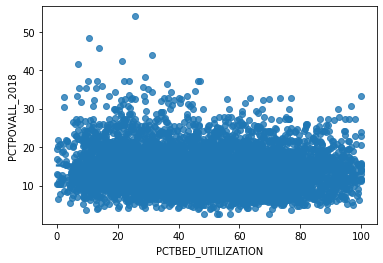

In [82]:
sb.regplot(beds_poverty_df['PCTBED_UTILIZATION'], beds_poverty_df['PCTPOVALL_2018']);

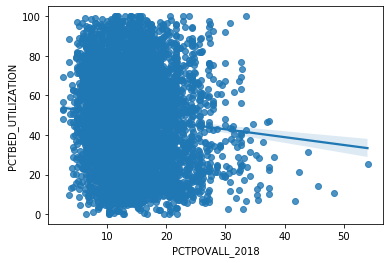

In [83]:
sb.regplot(beds_poverty_df['PCTPOVALL_2018'], beds_poverty_df['PCTBED_UTILIZATION']);

In [98]:
beds_poverty_df[['PCTPOVALL_2018', 'PCTBED_UTILIZATION']].describe()

,PCTPOVALL_2018,PCTBED_UTILIZATION
count,5849.000000,5849.000000
mean,14.245392,49.135749
std,5.268514,23.574880
min,2.600000,0.072098
25%,10.600000,29.932964
50%,13.800000,49.676713
75%,16.800000,67.704111
max,54.000000,100.000000


In [103]:
beds_poverty_df['HOSPITAL_TYPE'].unique()
#hospital_types = beds_poverty_df[['HOSPITAL_TYPE']].unique()
#pd.api.types.CategoricalDtype(ordered=True, categories=fuel_make_filter.index)

array(['Short Term Acute Care Hospital', 'Critical Access Hospital',
       'Psychiatric Hospital', 'Long Term Acute Care Hospital',
       'Rehabilitation Hospital', 'Childrens Hospital',
       'Religious Non-Medical Health Care Institution'], dtype=object)

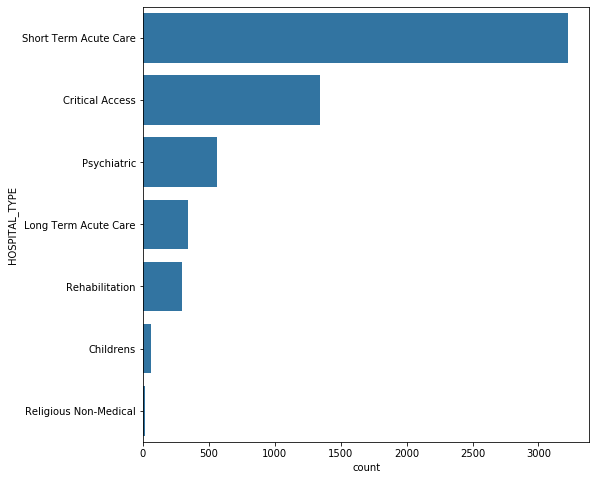

In [56]:
plt.figure(figsize=[8, 8])
base_color = sb.color_palette()[0]
hos_labels = ['Short Term Acute Care', 'Critical Access', 'Psychiatric', 'Long Term Acute Care', 'Rehabilitation', 'Childrens', 'Religious Non-Medical']
sb.countplot(data=beds_poverty_df, y='HOSPITAL_TYPE', color=base_color);
ax = plt.gca()
ax.set_yticklabels(hos_labels)
plt.show()

## Question: Which hospitals types are reporting their bed utilizations?

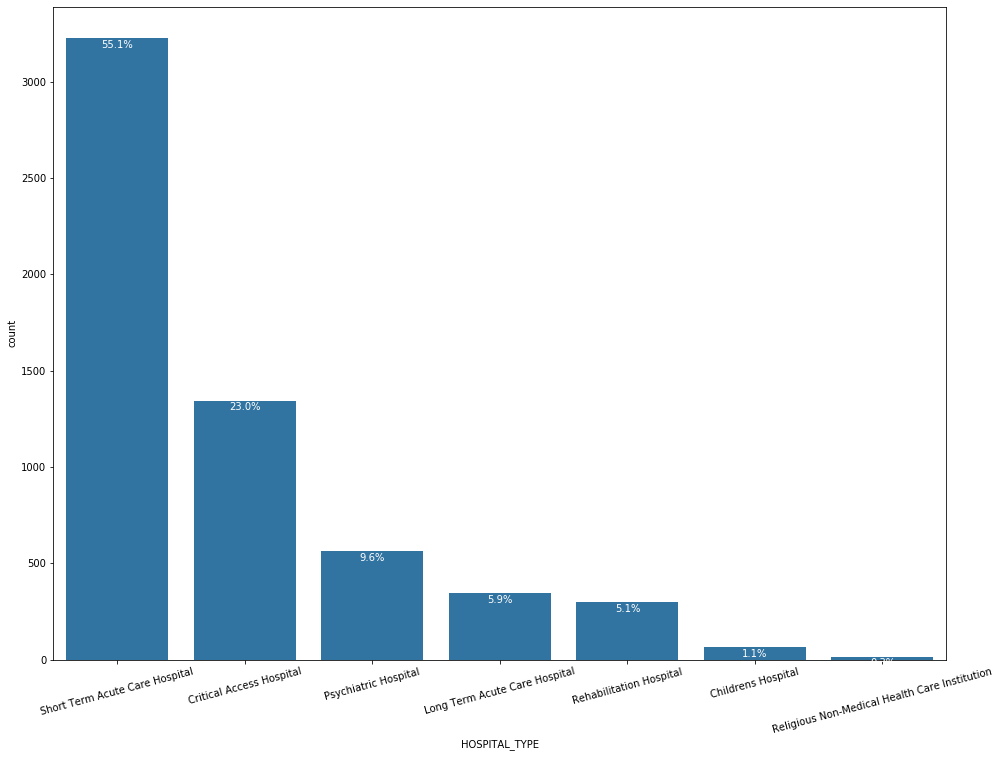

In [60]:
#Question: Which hospitals types are reporting their bed utilizations.
plt.figure(figsize=[16, 12])
#plt.rcParams["figure.figsize"] = [16,9]

base_color = sb.color_palette()[0]
sb.countplot(data=beds_poverty_df, x='HOSPITAL_TYPE', color=base_color);

hos_labels = ['Short Term Acute Care', 'Critical Access', 'Psychiatric', 'Long Term Acute Care', 'Rehabilitation', 'Childrens', 'Religious Non-Medical' ]

#ax = plt.gca()
#ax.set_xticklabels(hos_labels)


# add annotations
n_points = beds_poverty_df.shape[0]
cat_counts = beds_poverty_df['HOSPITAL_TYPE'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.xticks(rotation=15)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-50, pct_string, ha = 'center', color = 'w')

plt.show()

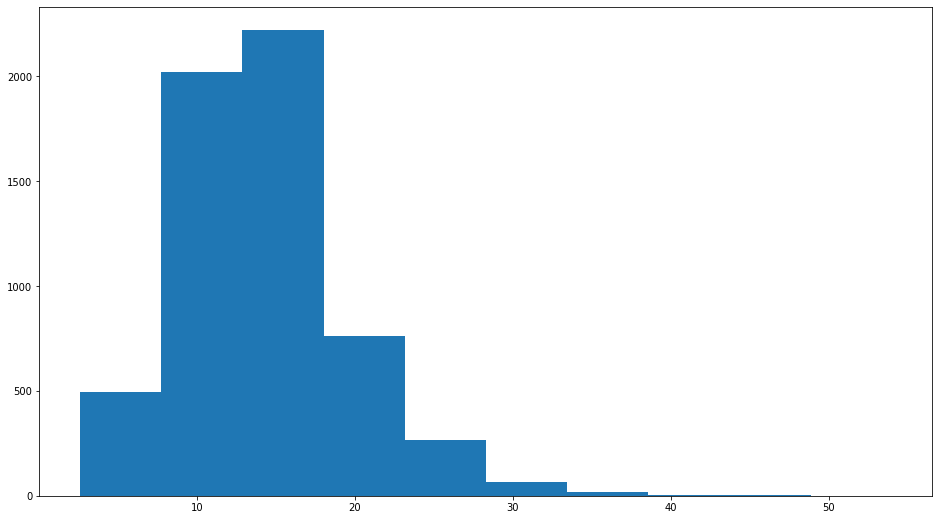

In [61]:
plt.hist(data=beds_poverty_df, x='PCTPOVALL_2018');

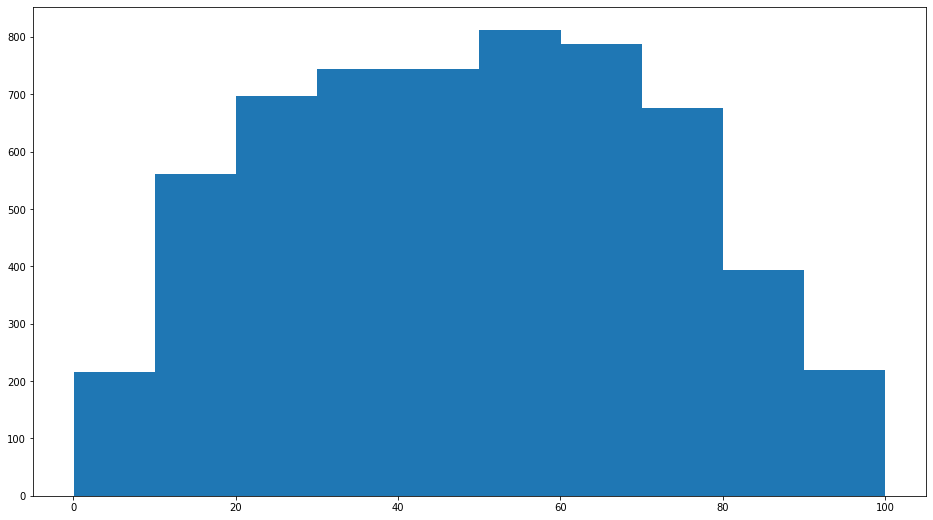

In [62]:
plt.hist(data=beds_poverty_df, x='PCTBED_UTILIZATION');

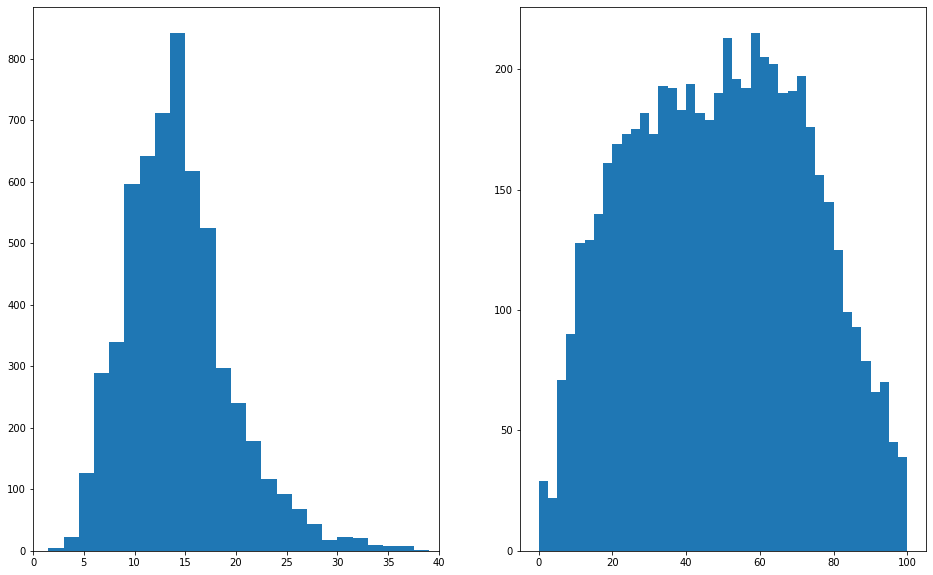

In [76]:
#Question: What is the poverty level distribution across all US counties.
#Question: What is the bed utilization distribution across all US counties.

plt.figure(figsize = [16, 10])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, beds_poverty_df['PCTPOVALL_2018'].max()+1.5, 1.5)
plt.hist(data = beds_poverty_df, x = 'PCTPOVALL_2018', bins = bin_edges)
plt.xlim(0, 40)

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, beds_poverty_df['PCTBED_UTILIZATION'].max()+2.5, 2.5)
plt.hist(data = beds_poverty_df, x = 'PCTBED_UTILIZATION', bins = bin_edges)
#plt.xlim(0, 35) # could also be called as plt.xlim((0, 35))
plt.show()


## Question: What is the ADULT ICU BED utilization distribution across all US counties? <br>
## Question: What is the PEDIATRIC ICU BED utilization distribution across all US counties?

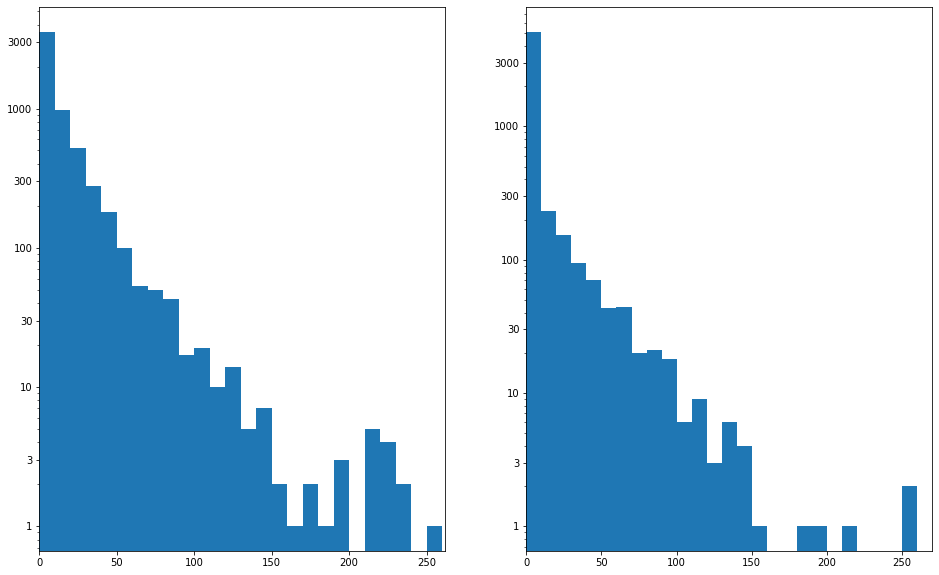

In [168]:
#Question: What is the ADULT ICU BED utilization distribution across all US counties.
#Question: What is the PEDIATRIC ICU BED utilization distribution across all US counties.

plt.figure(figsize = [16, 10])

tick_locs = [1,3, 10, 30, 100, 300, 1000, 3000]
# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, beds_poverty_df['ADULT_ICU_BEDS'].max()+10, 10)
plt.hist(data = beds_poverty_df, x = 'ADULT_ICU_BEDS', bins = bin_edges)
plt.yscale('log', nonposy='clip')
plt.xlim(0,beds_poverty_df['ADULT_ICU_BEDS'].max()+10)
plt.yticks(tick_locs, tick_locs)


# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0,  beds_poverty_df['PEDI_ICU_BEDS'].max()+10, 10)
plt.hist(data = beds_poverty_df, x = 'PEDI_ICU_BEDS', bins = bin_edges)
plt.yscale('log', nonposy='clip')
plt.xlim(0, beds_poverty_df['PEDI_ICU_BEDS'].max()+10) # could also be called as plt.xlim((0, 35))
plt.yticks(tick_locs, tick_locs)
plt.show()

In [89]:
beds_poverty_df[['ADULT_ICU_BEDS', 'PEDI_ICU_BEDS']].describe()

,ADULT_ICU_BEDS,PEDI_ICU_BEDS
count,5849.000000,5849.000000
mean,14.441785,4.917764
std,22.339442,16.835973
min,0.000000,0.000000
25%,4.000000,0.000000
50%,6.000000,0.000000
75%,17.000000,0.000000
max,252.000000,260.000000


In [150]:
beds_poverty_df[beds_poverty_df['ADULT_ICU_BEDS'].between(240, 260, inclusive=True)]['ADULT_ICU_BEDS'].count()

1

In [152]:
beds_poverty_df.groupby('ADULT_ICU_BEDS')['ADULT_ICU_BEDS'].count()

ADULT_ICU_BEDS
0       775
1       101
2       221
3       341
4      1006
       ... 
227       1
229       1
230       1
238       1
252       1
Name: ADULT_ICU_BEDS, Length: 149, dtype: int64

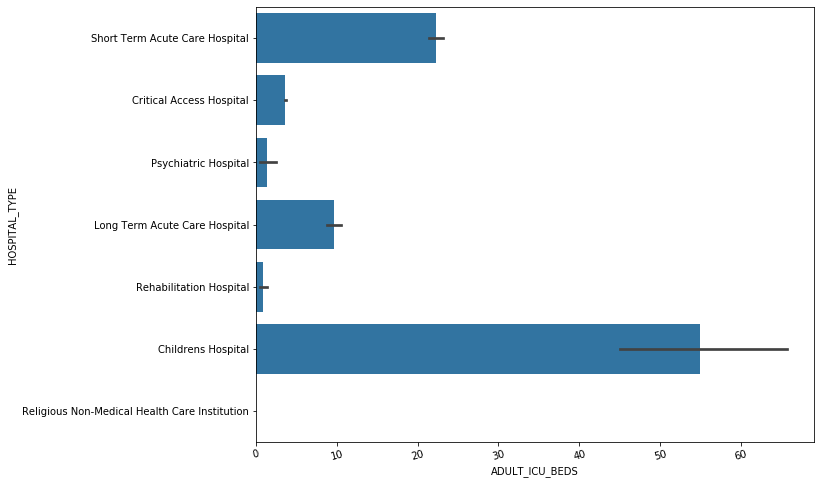

In [170]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,8])
sb.barplot(data=beds_poverty_df, y='HOSPITAL_TYPE', x='ADULT_ICU_BEDS', color=base_color)
plt.xticks(rotation=15);

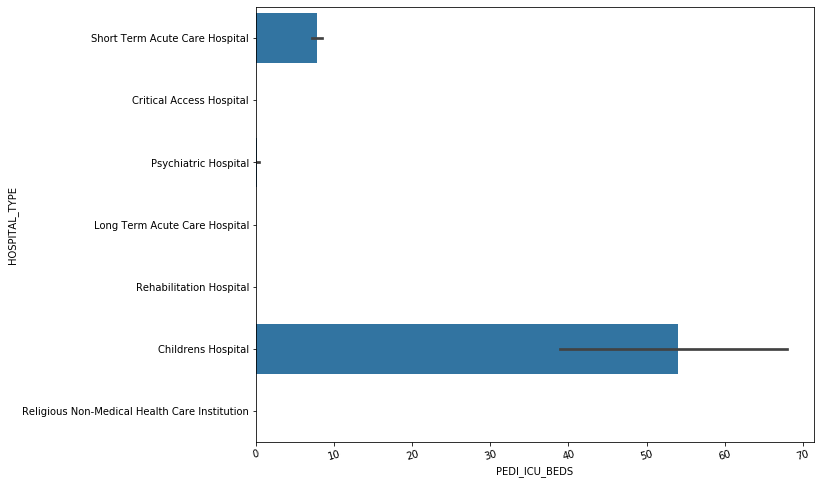

In [171]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,8])
sb.barplot(data=beds_poverty_df, y='HOSPITAL_TYPE', x='PEDI_ICU_BEDS', color=base_color)
plt.xticks(rotation=15);

In [33]:
beds_poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5848
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                5849 non-null   float64
 1   Y                                5849 non-null   float64
 2   OBJECTID                         5849 non-null   int64  
 3   HOSPITAL_NAME                    5849 non-null   object 
 4   HOSPITAL_TYPE                    5849 non-null   object 
 5   HQ_ADDRESS                       5849 non-null   object 
 6   HQ_ADDRESS1                      5849 non-null   object 
 7   HQ_CITY                          5849 non-null   object 
 8   HQ_STATE                         5849 non-null   object 
 9   HQ_ZIP_CODE                      5849 non-null   int64  
 10  COUNTY_NAME                      5849 non-null   object 
 11  STATE_NAME                       5849 non-null   object 
 12  STATE_FIPS          

## Question: What percentage of beds are utilized by which hospital types?

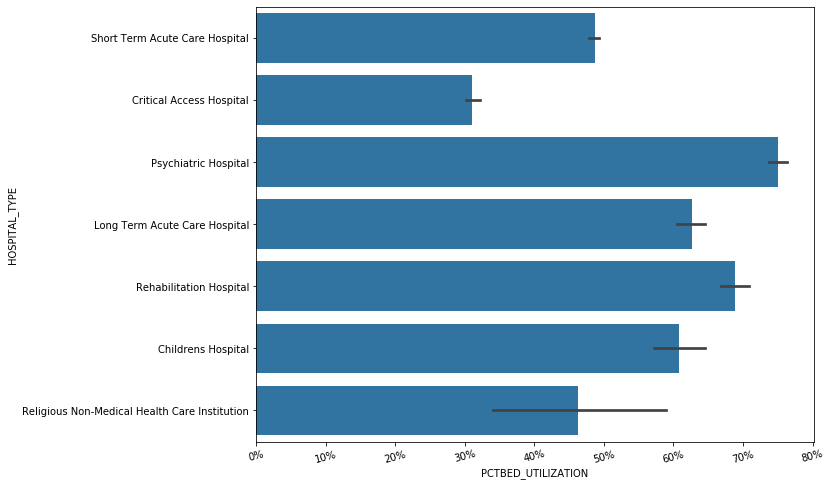

In [69]:
#Question: What percentage of beds are utilized by hospital types.
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,8])
sb.barplot(data=beds_poverty_df, y='HOSPITAL_TYPE', x='PCTBED_UTILIZATION', color=base_color)
plt.xticks(rotation=15)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter());

In [35]:
beds_poverty_df['PCTPOVALL_2018'].describe()

count    5849.000000
mean       14.245392
std         5.268514
min         2.600000
25%        10.600000
50%        13.800000
75%        16.800000
max        54.000000
Name: PCTPOVALL_2018, dtype: float64

In [36]:
beds_poverty_df[beds_poverty_df['PCTPOVALL_2018'] == 54]

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION
4456,-102.736,43.3266,3447,Pine Ridge Service Unit (AKA Pine Ridge Hospital),Short Term Acute Care Hospital,East Hwy 18,,Pine Ridge,SD,57770,...,45.0,45.0,8,8,0.0,0.255341,0,0.0,54.0,25.534084


In [37]:
beds_poverty_df['PCTBED_UTILIZATION'].describe()

count    5849.000000
mean       49.135749
std        23.574880
min         0.072098
25%        29.932964
50%        49.676713
75%        67.704111
max       100.000000
Name: PCTBED_UTILIZATION, dtype: float64

In [38]:
beds_poverty_df[beds_poverty_df['PCTBED_UTILIZATION'] == 100]

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION
376,-122.208046,39.521321,295,Glenn Medical Center,Critical Access Hospital,1133 W Sycamore St,,Willows,CA,95988,...,47.0,15.0,3,3,0.0,1.0,32,1.0,15.4,100.0
878,-75.629485,39.639812,5687,MeadowWood Behavioral Health Hospital,Psychiatric Hospital,575 S Dupont Hwy,,New Castle,DE,19720,...,120.0,100.0,0,0,0.0,1.0,20,0.0,11.6,100.0
974,-82.485516,28.527938,5340,Springbrook Hospital,Psychiatric Hospital,7007 Grove Rd,,Brooksville,FL,34609,...,66.0,66.0,0,0,0.0,1.0,0,0.0,14.1,100.0
1197,-83.772593,31.130301,897,Turning Point Hospital,Short Term Acute Care Hospital,3015 Veterans Pkwy S,,Moultrie,GA,31788,...,69.0,33.0,6,6,0.0,1.0,36,0.0,23.9,100.0
1303,-155.472070,19.199622,5193,Kau Hospital,Critical Access Hospital,1 Kamani St,,Pahale,HI,96777,...,21.0,6.0,1,1,0.0,1.0,15,1.0,15.6,100.0
1884,-98.114240,39.466657,1481,Mitchell County Hospital Health Systems,Critical Access Hospital,400 W 8th St,PO BOX 399,Beloit,KS,67420,...,25.0,16.0,4,4,0.0,1.0,9,0.0,11.4,100.0
2560,-83.693425,42.169621,5878,Center for Forensic Psychiatry,Psychiatric Hospital,8303 Platt Rd,,Saline,MI,48176,...,240.0,240.0,0,0,0.0,1.0,0,0.0,15.0,100.0
2736,-89.425255,31.166459,4570,South Mississippi State Hospital,Psychiatric Hospital,823 Highway 589,,Purvis,MS,39475,...,50.0,45.0,0,0,0.0,1.0,5,0.0,14.0,100.0
2932,-90.277360,38.604975,4941,St Louis Psychiatric Rehabilitation Center,Psychiatric Hospital,5300 Arsenal St,,Saint Louis,MO,63139,...,180.0,180.0,0,0,0.0,1.0,0,0.0,22.8,100.0
2949,-112.791016,46.180915,4523,Montana State Hospital,Psychiatric Hospital,300 Garnet Way,,Warm Springs,MT,59756,...,174.0,174.0,0,0,0.0,1.0,0,0.0,15.9,100.0


In [39]:
beds_poverty_df[beds_poverty_df['PCTBED_UTILIZATION'] == 0]

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION


In [41]:
beds_poverty_df['BED_UTILIZATION'].describe()

count    5849.000000
mean        0.491357
std         0.235749
min         0.000721
25%         0.299330
50%         0.496767
75%         0.677041
max         1.000000
Name: BED_UTILIZATION, dtype: float64

In [43]:
beds_poverty_df[beds_poverty_df['BED_UTILIZATION'] == 1]

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION
376,-122.208046,39.521321,295,Glenn Medical Center,Critical Access Hospital,1133 W Sycamore St,,Willows,CA,95988,...,47.0,15.0,3,3,0.0,1.0,32,1.0,15.4,100.0
878,-75.629485,39.639812,5687,MeadowWood Behavioral Health Hospital,Psychiatric Hospital,575 S Dupont Hwy,,New Castle,DE,19720,...,120.0,100.0,0,0,0.0,1.0,20,0.0,11.6,100.0
974,-82.485516,28.527938,5340,Springbrook Hospital,Psychiatric Hospital,7007 Grove Rd,,Brooksville,FL,34609,...,66.0,66.0,0,0,0.0,1.0,0,0.0,14.1,100.0
1197,-83.772593,31.130301,897,Turning Point Hospital,Short Term Acute Care Hospital,3015 Veterans Pkwy S,,Moultrie,GA,31788,...,69.0,33.0,6,6,0.0,1.0,36,0.0,23.9,100.0
1303,-155.472070,19.199622,5193,Kau Hospital,Critical Access Hospital,1 Kamani St,,Pahale,HI,96777,...,21.0,6.0,1,1,0.0,1.0,15,1.0,15.6,100.0
1884,-98.114240,39.466657,1481,Mitchell County Hospital Health Systems,Critical Access Hospital,400 W 8th St,PO BOX 399,Beloit,KS,67420,...,25.0,16.0,4,4,0.0,1.0,9,0.0,11.4,100.0
2560,-83.693425,42.169621,5878,Center for Forensic Psychiatry,Psychiatric Hospital,8303 Platt Rd,,Saline,MI,48176,...,240.0,240.0,0,0,0.0,1.0,0,0.0,15.0,100.0
2736,-89.425255,31.166459,4570,South Mississippi State Hospital,Psychiatric Hospital,823 Highway 589,,Purvis,MS,39475,...,50.0,45.0,0,0,0.0,1.0,5,0.0,14.0,100.0
2932,-90.277360,38.604975,4941,St Louis Psychiatric Rehabilitation Center,Psychiatric Hospital,5300 Arsenal St,,Saint Louis,MO,63139,...,180.0,180.0,0,0,0.0,1.0,0,0.0,22.8,100.0
2949,-112.791016,46.180915,4523,Montana State Hospital,Psychiatric Hospital,300 Garnet Way,,Warm Springs,MT,59756,...,174.0,174.0,0,0,0.0,1.0,0,0.0,15.9,100.0


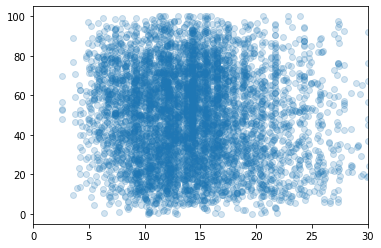

In [49]:
plt.scatter(data=beds_poverty_df, x="PCTPOVALL_2018", y="PCTBED_UTILIZATION", alpha = 1/5)
plt.xlim(0, 30);

## Question: Does poverty level has any infulance on bed utilization?

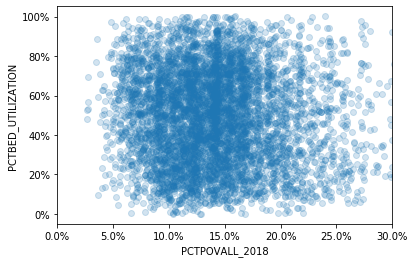

In [68]:
sb.regplot(data = beds_poverty_df, x = 'PCTPOVALL_2018', y = 'PCTBED_UTILIZATION', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5})
plt.xlim(0,30)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

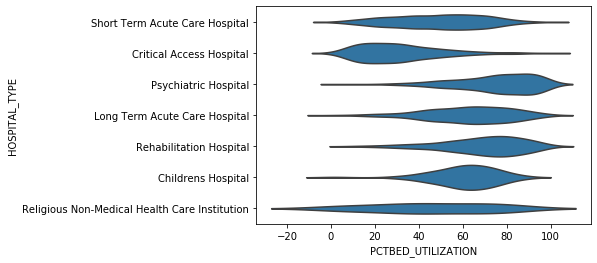

In [56]:
base_color = sb.color_palette()[0]
sb.violinplot(data = beds_poverty_df, x = 'PCTBED_UTILIZATION', y = 'HOSPITAL_TYPE', color = base_color,
              inner = None);

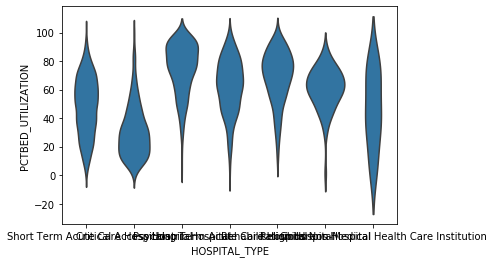

In [57]:
base_color = sb.color_palette()[0]
sb.violinplot(data = beds_poverty_df, x = 'HOSPITAL_TYPE', y = 'PCTBED_UTILIZATION', color = base_color,
              inner = None);

In [58]:
beds_poverty_df[beds_poverty_df['PCTBED_UTILIZATION'] < 1]

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION
274,-93.057190,34.510017,219,Levi Hospital (AKA Leo N Levi National Arthrit...,Short Term Acute Care Hospital,300 Prospect Ave,,Hot Springs,AR,71901,...,50.0,1.0,0,0,0.0,0.002740,49,0.0,20.4,0.273973
842,-72.729481,41.802792,663,Hebrew Senior Care,Short Term Acute Care Hospital,1 Abrahms Blvd,,West Hartford,CT,6117,...,23.0,23.0,4,4,0.0,0.007028,0,0.0,11.2,0.702799
2105,-91.141200,30.833700,1645,Villa Feliciana Medical Complex,Short Term Acute Care Hospital,5002 Highway 10,,Jackson,LA,70748,...,299.0,299.0,52,52,0.0,0.001413,0,0.0,19.6,0.141318
2438,-86.242417,44.636512,1855,Munson Healthcare Paul Oliver Memorial Hospital,Critical Access Hospital,224 Park Ave,,Frankfort,MI,49635,...,8.0,8.0,1,1,0.0,0.009932,0,0.0,10.3,0.993151
2600,-94.608375,47.384577,1986,Cass Lake Indian Health Service Unit (AKA Cass...,Critical Access Hospital,425 7th St Nw,,Cass Lake,MN,56633,...,5.0,5.0,1,1,0.0,0.001096,0,0.0,12.9,0.109589
2624,-93.264106,44.960195,2008,Phillips Eye Institute - a campus of Abbott No...,Short Term Acute Care Hospital,2215 Park Ave,,Minneapolis,MN,55404,...,20.0,8.0,1,1,0.0,0.002358,12,0.0,10.3,0.235849
2956,-106.911243,47.318887,2293,Garfield County Health Center,Critical Access Hospital,332 Leavitt Ave,,Jordan,MT,59337,...,25.0,4.0,1,1,0.0,0.006164,21,0.0,16.3,0.616438
4558,-86.430261,35.863920,5992,TrustPoint Hospital,Short Term Acute Care Hospital,1009 N Thompson Ln,,Murfreesboro,TN,37129,...,96.0,18.0,3,3,0.0,0.002740,78,0.0,10.4,0.273973
5109,-97.819740,30.523324,5775,Baylor Scott & White Emergency Medical Center ...,Short Term Acute Care Hospital,900 E Whitestone Blvd,,Cedar Park,TX,78613,...,8.0,8.0,1,1,0.0,0.002762,0,0.0,6.4,0.276243
5311,-119.868306,47.230900,4698,Quincy Valley Medical Center,Critical Access Hospital,908 10th Ave Sw,,Quincy,WA,98848,...,25.0,25.0,4,4,0.0,0.003068,0,1.0,12.7,0.306849


<Figure size 720x864 with 0 Axes>

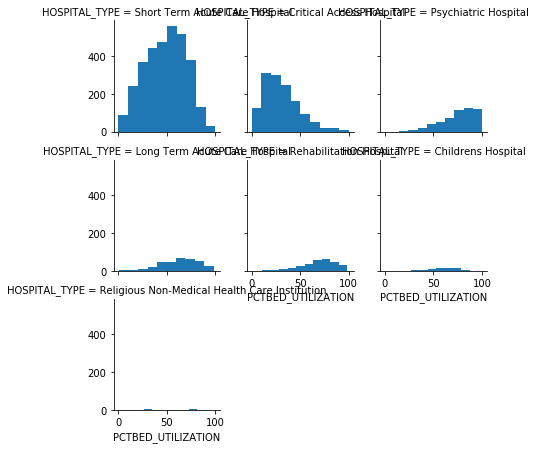

In [62]:
plt.figure(figsize=[10, 12])
g = sb.FacetGrid(data = beds_poverty_df, col = 'HOSPITAL_TYPE', col_wrap = 3, size = 2)
g.map(plt.hist, "PCTBED_UTILIZATION");

In [63]:
beds_poverty_df.groupby(['HOSPITAL_TYPE']).mean()

,X,Y,OBJECTID,HQ_ZIP_CODE,STATE_FIPS,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION
HOSPITAL_TYPE,,,,,,,,,,,,,,,,,
Childrens Hospital,-93.100942,36.833245,4113.312500,55324.734375,27.421875,122.609375,27544.484375,265.593750,254.468750,54.968750,54.968750,53.968750,0.608353,11.125000,4.421875,14.517188,60.835327
Critical Access Hospital,-96.655896,40.179781,2834.661951,60362.881608,29.935964,89.246463,30025.210722,25.446761,21.604617,3.614296,3.614296,0.000000,0.311204,3.842144,1.102755,14.402159,31.120385
Long Term Acute Care Hospital,-90.979652,36.064410,5047.892754,53107.156522,28.736232,102.017391,28838.249275,62.652174,60.446377,9.591304,9.591304,0.000000,0.626210,2.205797,2.939130,14.977101,62.621047
Psychiatric Hospital,-90.723470,37.186178,5287.147950,51396.445633,28.746881,89.547237,28836.427807,120.249554,108.664884,1.324421,1.324421,0.162210,0.750591,11.584670,0.114082,13.694474,75.059067
Rehabilitation Hospital,-90.741837,35.446449,5287.064189,53924.702703,31.219595,108.895270,31328.489865,62.527027,61.398649,0.858108,0.858108,0.000000,0.688201,1.128378,0.513514,14.170608,68.820145
Religious Non-Medical Health Care Institution,-97.403785,38.565815,5171.333333,60534.933333,27.133333,99.866667,27233.200000,11.800000,11.800000,0.000000,0.000000,0.000000,0.463554,0.000000,0.000000,12.173333,46.355445
Short Term Acute Care Hospital,-91.788032,37.316955,2314.073178,52047.375504,28.285271,93.065116,28378.336434,226.086822,189.342946,22.261085,22.261085,7.819845,0.486600,36.743876,6.158140,14.208775,48.659959


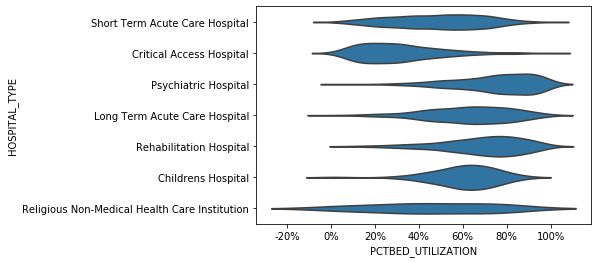

In [67]:
base_color = sb.color_palette()[0]
sb.violinplot(data = beds_poverty_df, x = 'PCTBED_UTILIZATION', y = 'HOSPITAL_TYPE', color = base_color,
              inner = None)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter());

In [75]:
top_povery_states = beds_poverty_df.groupby('HQ_STATE')['PCTPOVALL_2018'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head().index.tolist()

In [76]:
top_povery_states_df = beds_poverty_df[beds_poverty_df['HQ_STATE'].isin(top_povery_states)]

In [80]:
top_povery_states_df.groupby('HQ_STATE')['PCTPOVALL_2018'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head()

,mean,count
HQ_STATE,,
MS,21.479245,106
NM,20.905660,53
LA,19.680597,201
KY,18.541071,112
WV,18.463158,57


In [81]:
top_povery_states_df.groupby('HQ_STATE')['PCTBED_UTILIZATION'].agg(['mean', 'count']).sort_values(['mean'], ascending=False).head()

,mean,count
HQ_STATE,,
WV,48.364279,57
LA,48.136299,201
KY,46.063477,112
MS,43.072572,106
NM,42.887235,53


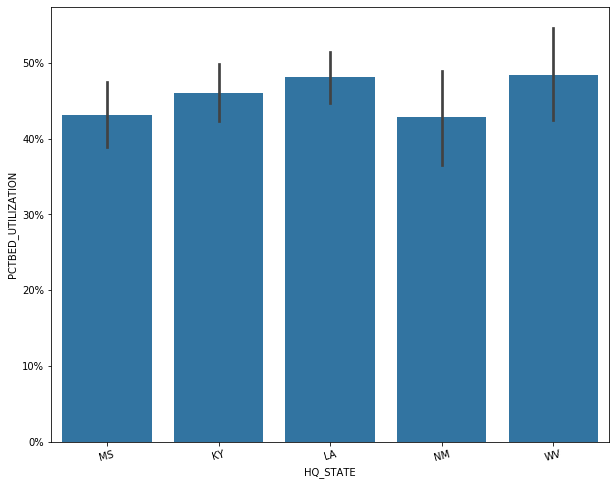

In [79]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,8])
sb.barplot(data=top_povery_states_df, x='HQ_STATE', y='PCTBED_UTILIZATION', color=base_color)
plt.xticks(rotation=15)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

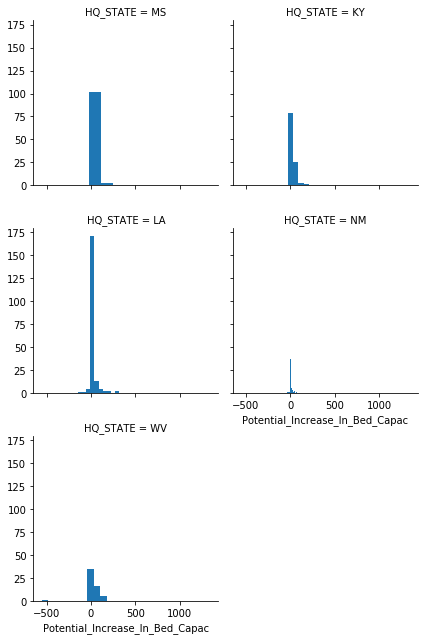

In [95]:
# base_color = sb.color_palette()[0]
# plt.figure(figsize=[10,8])
# sb.countplot(data=top_povery_states_df, x='HQ_STATE', y='Potential_Increase_In_Bed_Capac', color=base_color)
# plt.xticks(rotation=15)
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

#plt.figure(figsize=[10, 12])
#states = [['MS', 'NM']]
g = sb.FacetGrid(data = top_povery_states_df, col = 'HQ_STATE', col_wrap = 2)
g.map(plt.hist, "Potential_Increase_In_Bed_Capac");

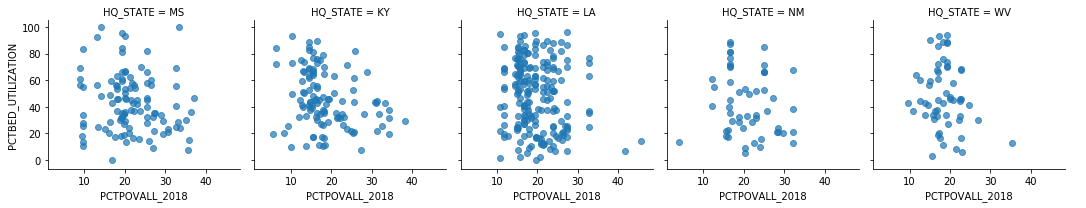

In [94]:
g = sb.FacetGrid(top_povery_states_df, col="HQ_STATE")
g.map(plt.scatter, "PCTPOVALL_2018", "PCTBED_UTILIZATION", alpha=.7)
g.add_legend();

In [97]:
top_povery_states_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 0 to 5845
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                529 non-null    float64
 1   Y                                529 non-null    float64
 2   OBJECTID                         529 non-null    int64  
 3   HOSPITAL_NAME                    529 non-null    object 
 4   HOSPITAL_TYPE                    529 non-null    object 
 5   HQ_ADDRESS                       529 non-null    object 
 6   HQ_ADDRESS1                      529 non-null    object 
 7   HQ_CITY                          529 non-null    object 
 8   HQ_STATE                         529 non-null    object 
 9   HQ_ZIP_CODE                      529 non-null    int64  
 10  COUNTY_NAME                      529 non-null    object 
 11  STATE_NAME                       529 non-null    object 
 12  STATE_FIPS           

In [106]:
top_povery_states_df[['BED_UTILIZATION', 'Potential_Increase_In_Bed_Capac']].corr()

,BED_UTILIZATION,Potential_Increase_In_Bed_Capac
BED_UTILIZATION,1.000000,0.086909
Potential_Increase_In_Bed_Capac,0.086909,1.000000


In [100]:
top_povery_states_df[['PCTPOVALL_2018', 'PCTPTIN_BED_CAPC', 'PCTBED_UTILIZATION']].corr()

,PCTPOVALL_2018,PCTPTIN_BED_CAPC,PCTBED_UTILIZATION
PCTPOVALL_2018,1.000000,-0.074901,-0.179341
PCTPTIN_BED_CAPC,-0.074901,1.000000,0.086909
PCTBED_UTILIZATION,-0.179341,0.086909,1.000000


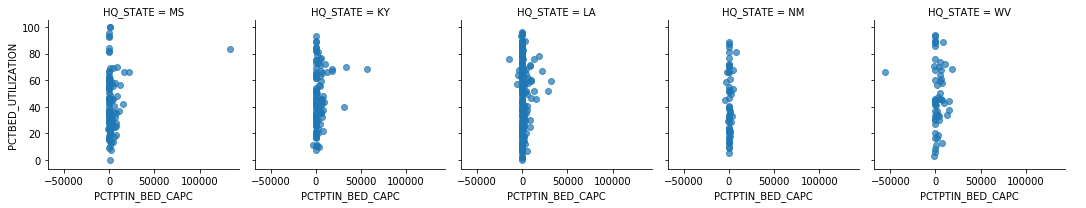

In [102]:
g = sb.FacetGrid(top_povery_states_df, col="HQ_STATE")
g.map(plt.scatter, "PCTBED_UTILIZATION", "PCTPTIN_BED_CAPC", alpha=.7)
g.add_legend();

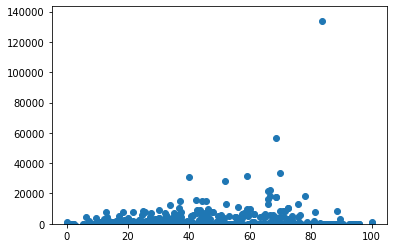

In [104]:
plt.scatter(data=top_povery_states_df, x='PCTBED_UTILIZATION', y='PCTPTIN_BED_CAPC')
plt.ylim(0);

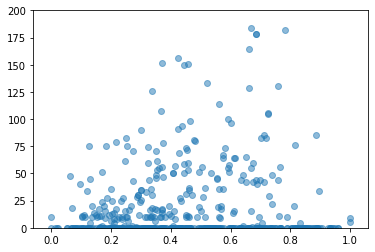

In [111]:
plt.scatter(data=top_povery_states_df, x='BED_UTILIZATION', y='Potential_Increase_In_Bed_Capac', alpha = 1/2)
plt.ylim(0, 200);

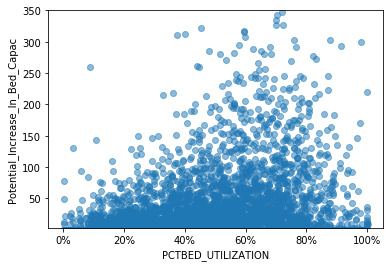

In [175]:
sb.regplot(data = beds_poverty_df, x = 'PCTBED_UTILIZATION', y = 'Potential_Increase_In_Bed_Capac', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/2})
plt.ylim(3,350)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter());
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

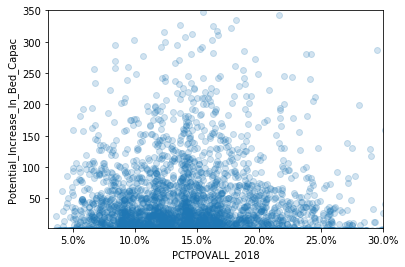

In [174]:
sb.regplot(data = beds_poverty_df, x = 'PCTPOVALL_2018', y = 'Potential_Increase_In_Bed_Capac', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/5})
plt.ylim(3,350)
plt.xlim(3,30)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter());

In [124]:
top_povery_states_df[['PCTPOVALL_2018', 'PCTBED_UTILIZATION', 'Potential_Increase_In_Bed_Capac']].corr()

,PCTPOVALL_2018,PCTBED_UTILIZATION,Potential_Increase_In_Bed_Capac
PCTPOVALL_2018,1.000000,-0.179341,-0.074901
PCTBED_UTILIZATION,-0.179341,1.000000,0.086909
Potential_Increase_In_Bed_Capac,-0.074901,0.086909,1.000000


<Figure size 864x1296 with 0 Axes>

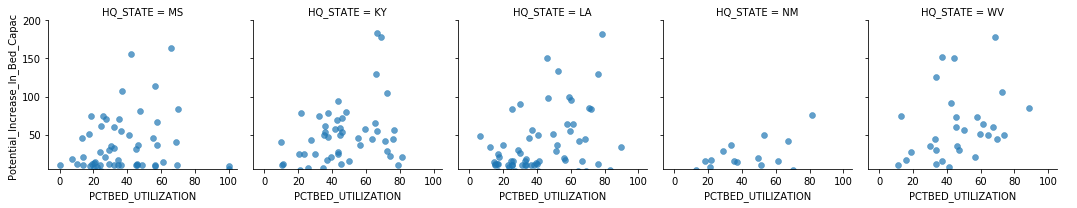

In [185]:
plt.figure(figsize=[12,18])
g = sb.FacetGrid(top_povery_states_df, col="HQ_STATE")
g.map(plt.scatter, "PCTBED_UTILIZATION", "Potential_Increase_In_Bed_Capac", alpha=.7, linewidth=.5)
plt.ylim(5,200)
g.add_legend();

### The observation from the below indicates the bed availibility increases as the utilization increases. 
### The sequential color encoded poverty level points to the fact that counties with poverty level below 10% and above 30% could be benefited with this availability.

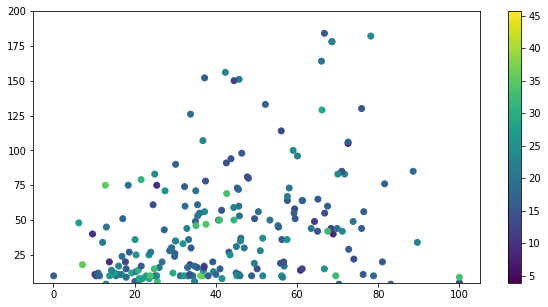

In [184]:
plt.figure(figsize=[10, 5])
plt.scatter(data=top_povery_states_df, x='PCTBED_UTILIZATION', y='Potential_Increase_In_Bed_Capac',
            c='PCTPOVALL_2018',
            cmap = 'viridis'
            )

plt.ylim(5,200)
plt.colorbar();

C:\Users\josyu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\josyu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


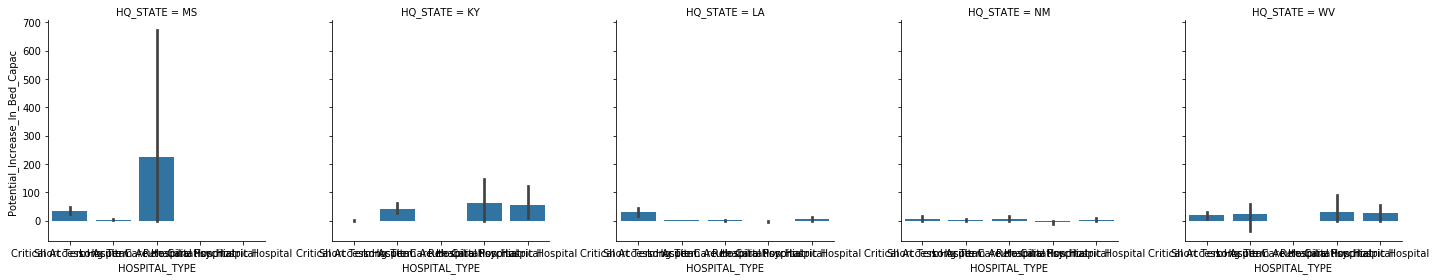

In [150]:
g = sb.FacetGrid(data = top_povery_states_df, col = 'HQ_STATE', size = 4)
g.map(sb.barplot, 'HOSPITAL_TYPE', 'Potential_Increase_In_Bed_Capac');


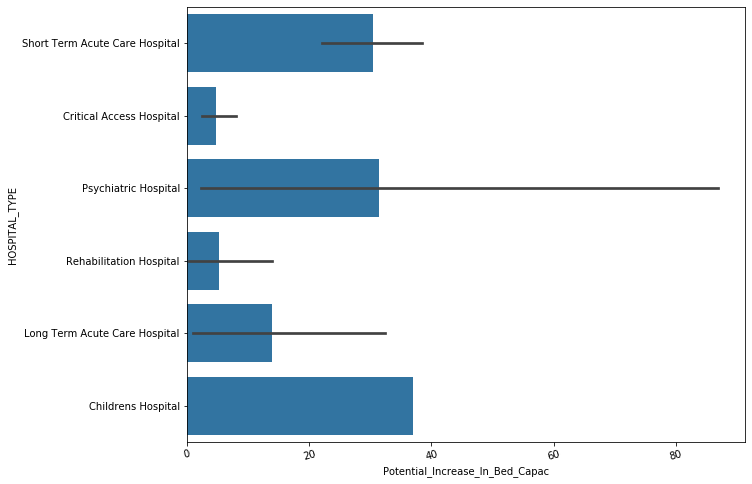

In [153]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10,8])
sb.barplot(data=top_povery_states_df, y='HOSPITAL_TYPE', x='Potential_Increase_In_Bed_Capac', color=base_color)
plt.xlim(0)
plt.xticks(rotation=15);

(0, 150)

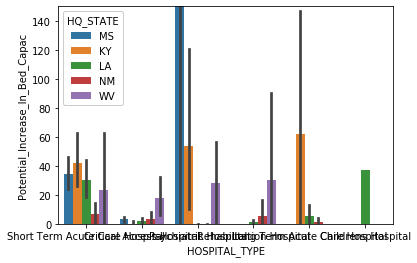

In [158]:
ax = sb.barplot(data = top_povery_states_df, x = 'HOSPITAL_TYPE', y = 'Potential_Increase_In_Bed_Capac', hue = 'HQ_STATE')
ax.legend(framealpha = 1, title = 'HQ_STATE')
plt.ylim(0, 150)

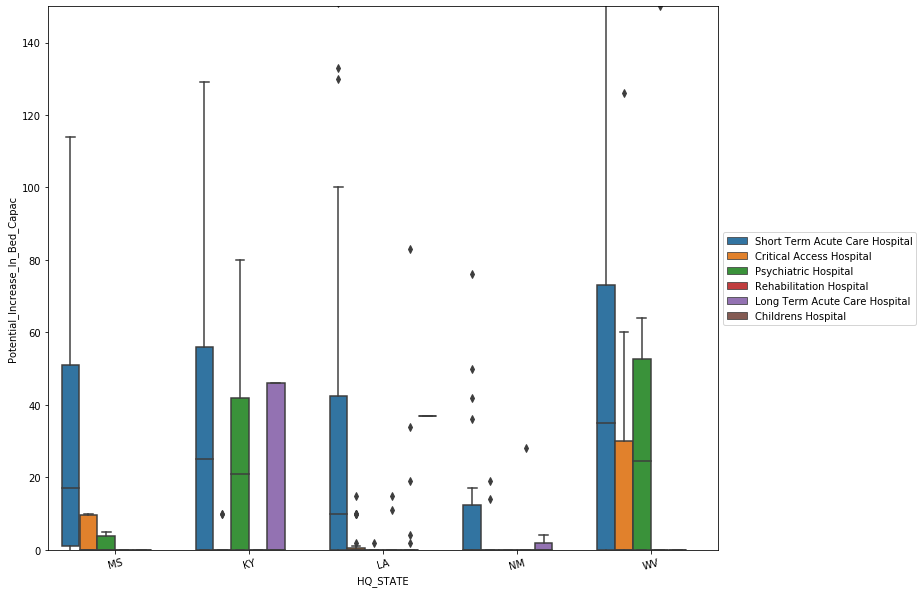

In [167]:
plt.figure(figsize=[12,10])
sb.boxplot(data = top_povery_states_df, x = 'HQ_STATE', y = 'Potential_Increase_In_Bed_Capac', hue = 'HOSPITAL_TYPE')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.ylim(0,150)
plt.xticks(rotation = 15);


<Figure size 864x1296 with 0 Axes>

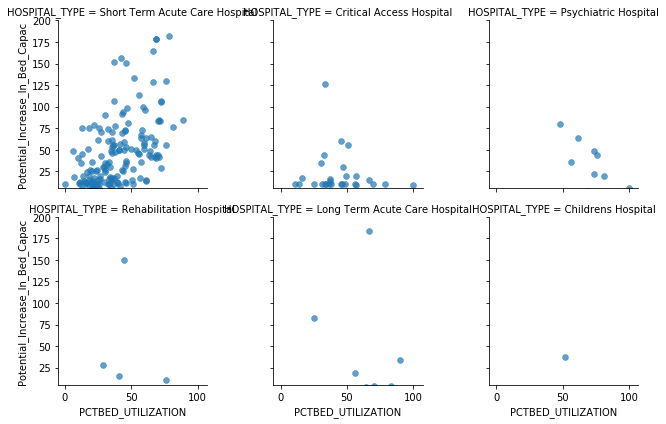

In [189]:
plt.figure(figsize=[12,18])
g = sb.FacetGrid(top_povery_states_df, col="HOSPITAL_TYPE", col_wrap=3)
g.map(plt.scatter, "PCTBED_UTILIZATION", "Potential_Increase_In_Bed_Capac", alpha=.7, linewidth=.5)
#plt.xlim(25,100)
plt.ylim(5,200)
g.add_legend();

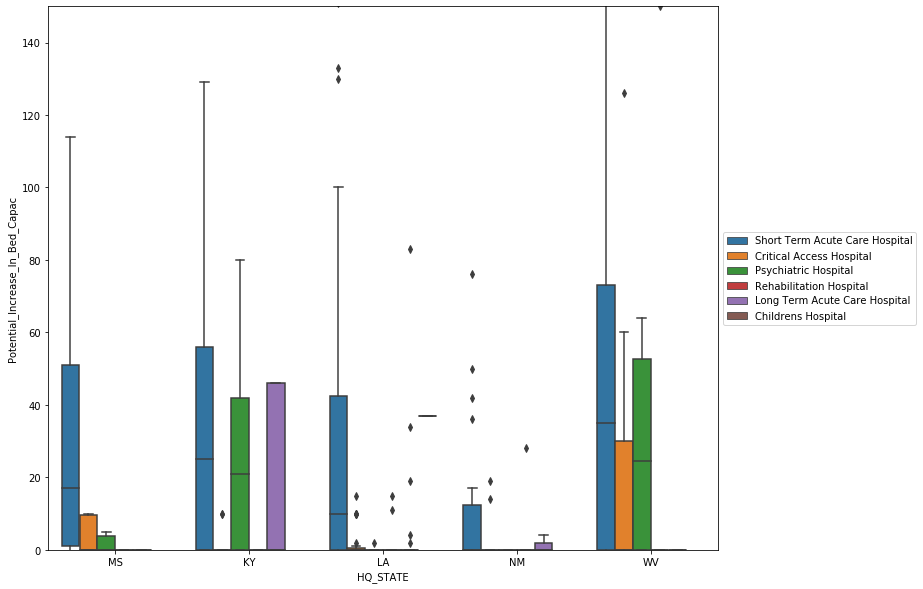

In [195]:
plt.figure(figsize=[12,10])
sb.boxplot(data = top_povery_states_df, x = 'HQ_STATE', y = 'Potential_Increase_In_Bed_Capac', hue = 'HOSPITAL_TYPE')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.ylim(0,150);
#plt.xticks(rotation = 15);

In [197]:
top_povery_states_df.groupby(['HOSPITAL_TYPE', 'HQ_STATE'])['Potential_Increase_In_Bed_Capac'].agg(['mean', 'count']).sort_values(['count'], ascending=False)

mean  count
HOSPITAL_TYPE                  HQ_STATE                   
Short Term Acute Care Hospital LA         29.965909     88
                               MS         34.672131     61
                               KY         42.081967     61
Psychiatric Hospital           LA         -1.702703     37
Critical Access Hospital       MS          3.193548     31
Short Term Acute Care Hospital NM          6.838710     31
Critical Access Hospital       KY         -0.250000     28
                               LA          2.148148     27
Short Term Acute Care Hospital WV         23.080000     25
Long Term Acute Care Hospital  LA          5.200000     25
Rehabilitation Hospital        LA          1.130435     23
Critical Access Hospital       WV         18.142857     21
                               NM          3.300000     10
Psychiatric Hospital           KY         53.700000     10
Long Term Acute Care Hospital  KY         62.000000      8
                               MS          0.000000      7
Psychiatric Hospital           MS        224.166667      6
Rehabilitation Hospital        KY          0.000000      5
                               NM          5.600000      5
                               WV         30.000000      5
Psychiatric Hospital           WV         28.250000      4
                               NM         -4.250000      4
Long Term Acute Care Hospital  NM          1.333333      3
                               WV          0.000000      2
Rehabilitation Hospital        MS          0.000000      1
Childrens Hospital             LA         37.000000      1

<Figure size 864x1296 with 0 Axes>

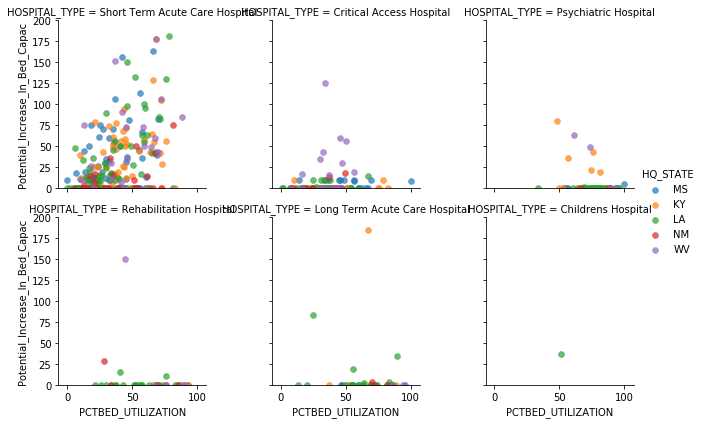

In [200]:
plt.figure(figsize=[12,18])
g = sb.FacetGrid(top_povery_states_df, col="HOSPITAL_TYPE", hue='HQ_STATE', col_wrap=3)
g.map(plt.scatter, "PCTBED_UTILIZATION", "Potential_Increase_In_Bed_Capac", alpha=.7, linewidth=.5)
#plt.xlim(25,100)
plt.ylim(0,200)
g.add_legend();

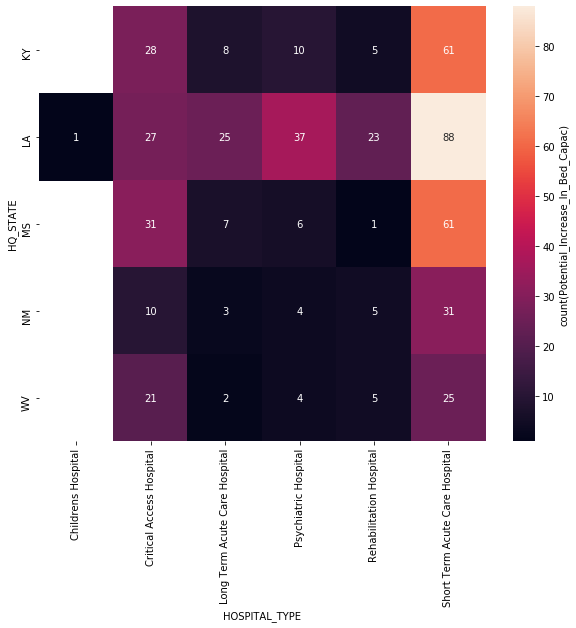

In [205]:
plt.figure(figsize=[10,8])
cat_counts = top_povery_states_df.groupby(['HOSPITAL_TYPE', 'HQ_STATE']).count()['Potential_Increase_In_Bed_Capac']
cat_counts = cat_counts.reset_index(name = 'num_var2_avg')
cat_counts = cat_counts.pivot(index = 'HQ_STATE', columns = 'HOSPITAL_TYPE',
                            values = 'num_var2_avg')
sb.heatmap(cat_counts, annot = True,
           cbar_kws = {'label' : 'count(Potential_Increase_In_Bed_Capac)'});

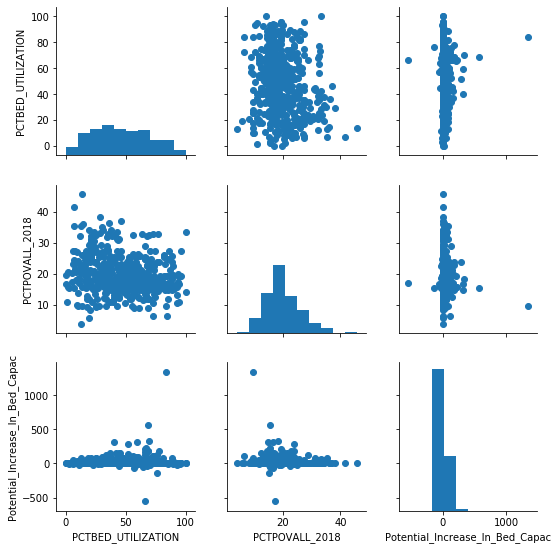

In [206]:
g = sb.PairGrid(data = top_povery_states_df, vars = ['PCTBED_UTILIZATION', 'PCTPOVALL_2018', 'Potential_Increase_In_Bed_Capac'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

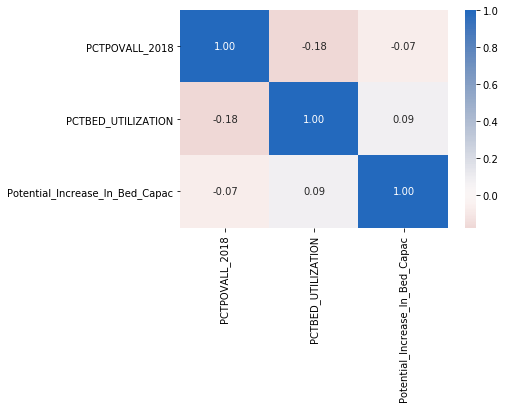

In [207]:
sb.heatmap(top_povery_states_df[['PCTPOVALL_2018', 'PCTBED_UTILIZATION', 'Potential_Increase_In_Bed_Capac']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

In [208]:
top_povery_states_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 0 to 5845
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                529 non-null    float64
 1   Y                                529 non-null    float64
 2   OBJECTID                         529 non-null    int64  
 3   HOSPITAL_NAME                    529 non-null    object 
 4   HOSPITAL_TYPE                    529 non-null    object 
 5   HQ_ADDRESS                       529 non-null    object 
 6   HQ_ADDRESS1                      529 non-null    object 
 7   HQ_CITY                          529 non-null    object 
 8   HQ_STATE                         529 non-null    object 
 9   HQ_ZIP_CODE                      529 non-null    int64  
 10  COUNTY_NAME                      529 non-null    object 
 11  STATE_NAME                       529 non-null    object 
 12  STATE_FIPS           

In [210]:
top_povery_states_df.groupby(['FIPS','HQ_STATE'])['Potential_Increase_In_Bed_Capac'].agg(['mean', 'count']).sort_values(['count'], ascending=False)

,,mean,count
FIPS,HQ_STATE,,
22033,LA,21.117647,17
22055,LA,-0.571429,14
22051,LA,19.692308,13
22071,LA,57.500000,12
35001,NM,2.181818,11
...,...,...,...
22091,LA,0.000000,1
22095,LA,0.000000,1
22123,LA,0.000000,1


In [211]:
top_povery_states_df

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION,PCTPTIN_BED_CAPC
0,-90.105308,32.325487,10,Merit Health River Oaks (FKA River Oaks Hospit...,Short Term Acute Care Hospital,1030 River Oaks Dr,,Flowood,MS,39232,...,160.0,10,10,20.0,0.279868,0,2.0,9.6,27.986822,0
1,-90.101250,32.329541,2122,Merit Health Womans Hospital (FKA Womans Hospi...,Short Term Acute Care Hospital,1026 N Flowood Dr,,Flowood,MS,39232,...,34.0,16,16,16.0,0.254714,75,1.0,9.6,25.471395,7500
2,-90.034841,32.286473,2155,Merit Health Rankin (FKA Crossgates River Oaks...,Short Term Acute Care Hospital,350 Crossgates Blvd,,Brandon,MS,39042,...,114.0,8,8,0.0,0.137900,20,2.0,9.6,13.789955,2000
3,-90.071900,32.235500,2156,Whitfield Medical Surgical Hospital,Short Term Acute Care Hospital,3550 Highway 468 W,Bldg 60,Whitfield,MS,39193,...,32.0,6,6,0.0,0.102397,11,0.0,9.6,10.239726,1100
4,-89.754900,32.377843,2158,Scott Regional Hospital (AKA Scott Regional Me...,Critical Access Hospital,317 Highway 13 S,,Morton,MS,39117,...,25.0,4,4,0.0,0.335562,0,0.0,9.6,33.556163,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,-106.679793,35.308833,5876,UNM Sandoval Regional Medical Center,Short Term Acute Care Hospital,3001 Broadmoor Blvd Ne,,Rio Rancho,NM,87144,...,60.0,11,11,0.0,0.545708,0,3.0,12.6,54.570776,0
5835,-89.986144,29.955816,5877,St Bernard Parish Hospital,Short Term Acute Care Hospital,8000 W Judge Perez Dr,,Chalmette,LA,70043,...,40.0,8,8,0.0,0.385959,0,2.0,20.1,38.595891,0
5839,-91.221817,30.267310,6118,Accord Rehabilitation Hospital,Rehabilitation Hospital,59213 River West Dr,,Plaquemine,LA,70764,...,10.0,0,0,0.0,0.684110,0,0.0,23.8,68.410957,0
5844,-90.414835,31.870271,6345,Copiah County Medical Center,Critical Access Hospital,27190 Highway 28,,Hazlehurst,MS,39083,...,25.0,4,4,0.0,0.604055,0,1.0,26.5,60.405481,0


In [220]:
 top_povery_states_df['PCTPTIN_BED_CAPC'] = top_povery_states_df['Potential_Increase_In_Bed_Capac']/(top_povery_states_df['NUM_STAFFED_BEDS'] + top_povery_states_df['Potential_Increase_In_Bed_Capac'])*100

C:\Users\josyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [221]:
top_povery_states_df.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION,PCTPTIN_BED_CAPC
0,-90.105308,32.325487,10,Merit Health River Oaks (FKA River Oaks Hospit...,Short Term Acute Care Hospital,1030 River Oaks Dr,,Flowood,MS,39232,...,160.0,10,10,20.0,0.279868,0,2.0,9.6,27.986822,0.000000
1,-90.101250,32.329541,2122,Merit Health Womans Hospital (FKA Womans Hospi...,Short Term Acute Care Hospital,1026 N Flowood Dr,,Flowood,MS,39232,...,34.0,16,16,16.0,0.254714,75,1.0,9.6,25.471395,68.807339
2,-90.034841,32.286473,2155,Merit Health Rankin (FKA Crossgates River Oaks...,Short Term Acute Care Hospital,350 Crossgates Blvd,,Brandon,MS,39042,...,114.0,8,8,0.0,0.137900,20,2.0,9.6,13.789955,14.925373
3,-90.071900,32.235500,2156,Whitfield Medical Surgical Hospital,Short Term Acute Care Hospital,3550 Highway 468 W,Bldg 60,Whitfield,MS,39193,...,32.0,6,6,0.0,0.102397,11,0.0,9.6,10.239726,25.581395
4,-89.754900,32.377843,2158,Scott Regional Hospital (AKA Scott Regional Me...,Critical Access Hospital,317 Highway 13 S,,Morton,MS,39117,...,25.0,4,4,0.0,0.335562,0,0.0,9.6,33.556163,0.000000


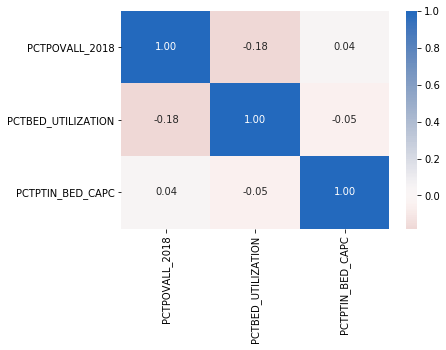

In [222]:
sb.heatmap(top_povery_states_df[['PCTPOVALL_2018', 'PCTBED_UTILIZATION', 'PCTPTIN_BED_CAPC']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

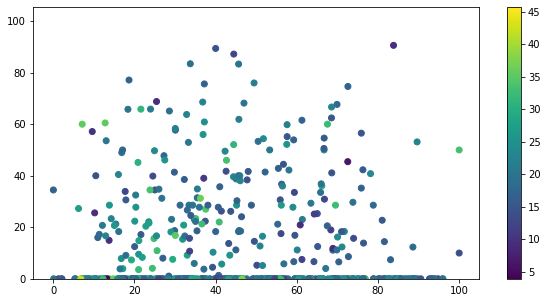

In [224]:
plt.figure(figsize=[10, 5])
plt.scatter(data=top_povery_states_df, x='PCTBED_UTILIZATION', y='PCTPTIN_BED_CAPC',
            c='PCTPOVALL_2018',
            cmap = 'viridis'
            )

plt.ylim(0)
plt.colorbar();

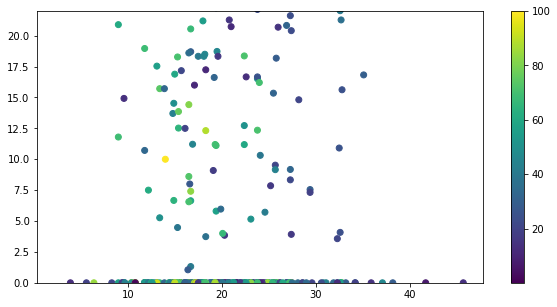

In [231]:
plt.figure(figsize=[10, 5])
plt.scatter(data=top_povery_states_df, x='PCTPOVALL_2018', y='PCTPTIN_BED_CAPC',
            c='PCTBED_UTILIZATION',
            cmap = 'viridis'
            )

plt.xlim(0.30)
plt.ylim(0,22)
plt.colorbar();

In [230]:
top_povery_states_df['PCTPTIN_BED_CAPC'].describe()

count    529.000000
mean      11.642300
std       24.831989
min     -206.716418
25%        0.000000
50%        0.000000
75%       22.349570
max       90.601758
Name: PCTPTIN_BED_CAPC, dtype: float64

In [232]:
beds_df.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
9,-90.105308,32.325487,10,Merit Health River Oaks (FKA River Oaks Hospit...,Short Term Acute Care Hospital,1030 River Oaks Dr,,Flowood,MS,39232,...,121,28121,160.0,160.0,10,10,20.0,0.279868,0,2.0
17,-86.451938,32.463778,18,Prattville Baptist Hospital,Short Term Acute Care Hospital,124 S Memorial Dr,,Prattville,AL,36067,...,1,1001,85.0,55.0,6,6,0.0,0.623113,30,2.0
18,-87.888307,30.519027,19,Thomas Hospital,Short Term Acute Care Hospital,750 Morphy Ave,,Fairhope,AL,36532,...,3,1003,150.0,129.0,17,17,0.0,0.770054,21,3.0
19,-87.785172,30.903945,20,North Baldwin Infirmary,Short Term Acute Care Hospital,1815 Hand Ave,,Bay Minette,AL,36507,...,3,1003,58.0,55.0,4,4,0.0,0.285131,3,2.0
20,-85.156357,31.888764,21,Medical Center Barbour,Short Term Acute Care Hospital,820 W Washington St,,Eufaula,AL,36027,...,5,1005,74.0,30.0,5,5,0.0,0.378721,44,2.0


In [238]:
beds_poverty_df['PCTPTIN_BED_CAPC'] = beds_poverty_df['Potential_Increase_In_Bed_Capac']/(beds_poverty_df['NUM_STAFFED_BEDS'] + beds_poverty_df['Potential_Increase_In_Bed_Capac'])*100

In [239]:
beds_poverty_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5848
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                5849 non-null   float64
 1   Y                                5849 non-null   float64
 2   OBJECTID                         5849 non-null   int64  
 3   HOSPITAL_NAME                    5849 non-null   object 
 4   HOSPITAL_TYPE                    5849 non-null   object 
 5   HQ_ADDRESS                       5849 non-null   object 
 6   HQ_ADDRESS1                      5849 non-null   object 
 7   HQ_CITY                          5849 non-null   object 
 8   HQ_STATE                         5849 non-null   object 
 9   HQ_ZIP_CODE                      5849 non-null   int64  
 10  COUNTY_NAME                      5849 non-null   object 
 11  STATE_NAME                       5849 non-null   object 
 12  STATE_FIPS          

In [236]:
['PCTBED_UTILIZATION'] = beds_poverty_df[['BED_UTILIZATION']]*100

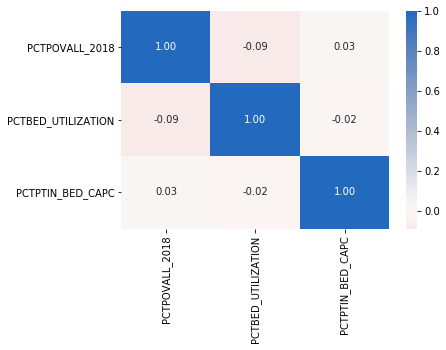

In [240]:
sb.heatmap(beds_poverty_df[['PCTPOVALL_2018', 'PCTBED_UTILIZATION', 'PCTPTIN_BED_CAPC']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

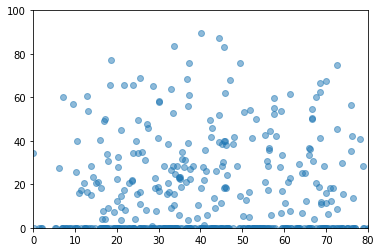

In [253]:
plt.scatter(data=top_povery_states_df, x='PCTBED_UTILIZATION', y='PCTPTIN_BED_CAPC', alpha = 1/2)
plt.xlim(0,80)
plt.ylim(0, 100);

In [247]:
top_povery_states_df[ top_povery_states_df[['PCTPTIN_BED_CAPC']] == 0 ]['PCTPTIN_BED_CAPC'].count()

286

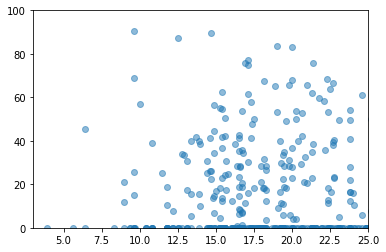

In [255]:
plt.scatter(data=top_povery_states_df, x='PCTPOVALL_2018', y='PCTPTIN_BED_CAPC', alpha = 1/2)
plt.xlim(3,25)
plt.ylim(0, 100);

In [256]:
sb.regplot(data=top_povery_states_df, x='PCTPOVALL_2018', y='PCTPTIN_BED_CAPC', alpha = 1/2)
plt.xlim(3,25)
plt.ylim(0, 100);

TypeError: regplot() got an unexpected keyword argument 'alpha'

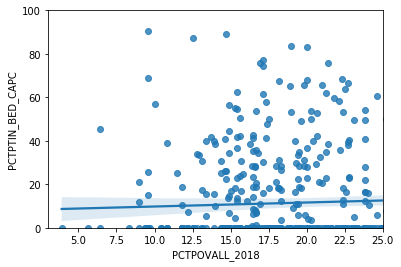

In [258]:
sb.regplot(top_povery_states_df['PCTPOVALL_2018'], top_povery_states_df['PCTPTIN_BED_CAPC']);
plt.xlim(3,25)
plt.ylim(0, 100);

In [265]:
top_pvt_nonnull = top_povery_states_df.query('PCTPTIN_BED_CAPC >0')

In [266]:
top_pvt_nonnull.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION,PCTPTIN_BED_CAPC
1,-90.101250,32.329541,2122,Merit Health Womans Hospital (FKA Womans Hospi...,Short Term Acute Care Hospital,1026 N Flowood Dr,,Flowood,MS,39232,...,34.0,16,16,16.0,0.254714,75,1.0,9.6,25.471395,68.807339
2,-90.034841,32.286473,2155,Merit Health Rankin (FKA Crossgates River Oaks...,Short Term Acute Care Hospital,350 Crossgates Blvd,,Brandon,MS,39042,...,114.0,8,8,0.0,0.137900,20,2.0,9.6,13.789955,14.925373
3,-90.071900,32.235500,2156,Whitfield Medical Surgical Hospital,Short Term Acute Care Hospital,3550 Highway 468 W,Bldg 60,Whitfield,MS,39193,...,32.0,6,6,0.0,0.102397,11,0.0,9.6,10.239726,25.581395
5,-90.071900,32.235500,4365,Mississippi State Hospital,Psychiatric Hospital,3550 Highway 468 W,,Whitfield,MS,39193,...,139.0,0,0,0.0,0.838396,1340,0.0,9.6,83.839560,90.601758
1937,-85.904816,37.011101,1527,T J Samson Community Hospital,Short Term Acute Care Hospital,1301 N Race St,,Glasgow,KY,42141,...,108.0,10,10,4.0,0.456038,72,3.0,19.2,45.603755,40.000000


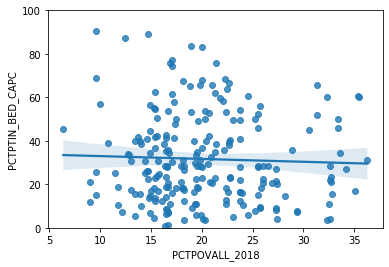

In [268]:
sb.regplot(top_pvt_nonnull['PCTPOVALL_2018'], top_pvt_nonnull['PCTPTIN_BED_CAPC']);
#plt.xlim(3,25)
plt.ylim(0, 100);

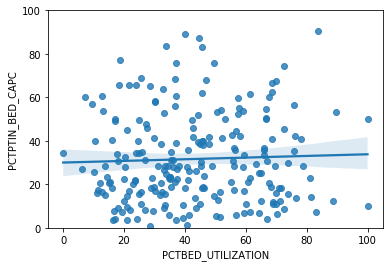

In [269]:
sb.regplot(top_pvt_nonnull['PCTBED_UTILIZATION'], top_pvt_nonnull['PCTPTIN_BED_CAPC']);
#plt.xlim(3,25)
plt.ylim(0, 100);

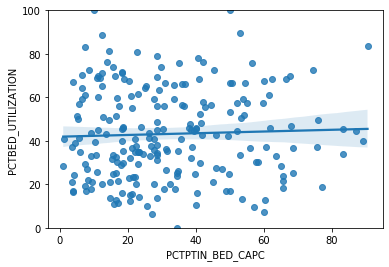

In [270]:
sb.regplot(top_pvt_nonnull['PCTPTIN_BED_CAPC'], top_pvt_nonnull['PCTBED_UTILIZATION']);
#plt.xlim(3,25)
plt.ylim(0, 100);

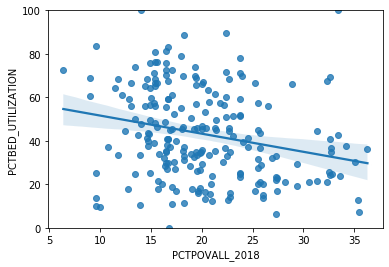

In [271]:
sb.regplot(top_pvt_nonnull['PCTPOVALL_2018'], top_pvt_nonnull['PCTBED_UTILIZATION']);
#plt.xlim(3,25)
plt.ylim(0, 100);

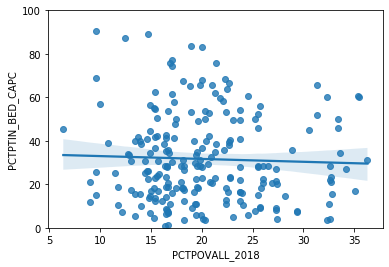

In [272]:
sb.regplot(top_pvt_nonnull['PCTPOVALL_2018'], top_pvt_nonnull['PCTPTIN_BED_CAPC']);
#plt.xlim(3,25)
plt.ylim(0, 100);

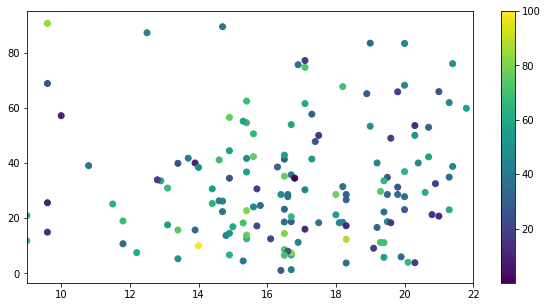

In [375]:
plt.figure(figsize=[10, 5])
plt.scatter(data=top_pvt_nonnull, x='PCTPOVALL_2018', y='PCTPTIN_BED_CAPC',
            c='PCTBED_UTILIZATION',
            cmap = 'viridis'
            )

plt.xlim(9,22)
#plt.ylim(0,22)
plt.colorbar();

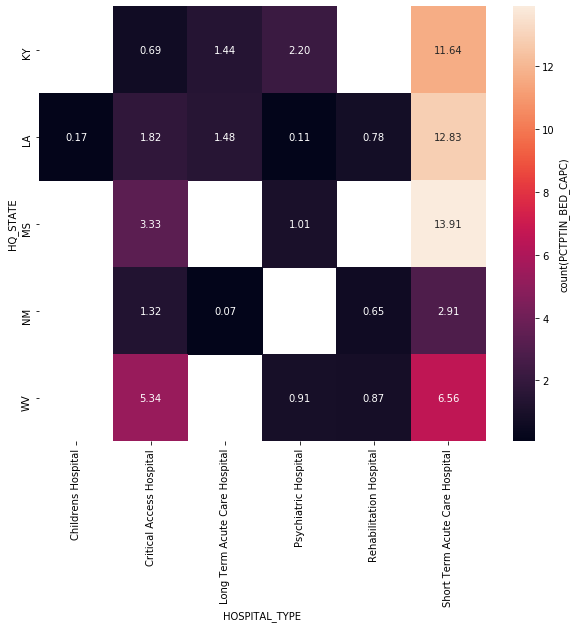

In [309]:
plt.figure(figsize=[10,8])
cat_counts = top_pvt_nonnull.groupby(['HOSPITAL_TYPE', 'HQ_STATE'])['PCTPTIN_BED_CAPC'].sum().transform(lambda x: x/100)
cat_counts = cat_counts.reset_index(name = 'num_var2_avg')
cat_counts = cat_counts.pivot(index = 'HQ_STATE', columns = 'HOSPITAL_TYPE',
                            values = 'num_var2_avg')
sb.heatmap(cat_counts, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'count(PCTPTIN_BED_CAPC)'});

In [282]:
top_pvt_nonnull.groupby(['HOSPITAL_TYPE', 'HQ_STATE'])['PCTPTIN_BED_CAPC'].sum()

HOSPITAL_TYPE                   HQ_STATE
Childrens Hospital              LA            16.517857
Critical Access Hospital        KY            68.571429
                                LA           182.043198
                                MS           332.678571
                                NM           132.000000
                                WV           534.338668
Long Term Acute Care Hospital   KY           143.997687
                                LA           147.544834
                                NM             6.557377
Psychiatric Hospital            KY           219.719687
                                LA            11.111111
                                MS           100.601758
                                WV            91.235431
Rehabilitation Hospital         LA            78.021978
                                NM            65.116279
                                WV            87.209302
Short Term Acute Care Hospital  KY          1164.380070
       

In [285]:
top_pvt_nonnull.groupby(['HOSPITAL_TYPE', 'HQ_STATE'])['PCTPTIN_BED_CAPC'].sum().transform(lambda x: x/100)

HOSPITAL_TYPE                   HQ_STATE
Childrens Hospital              LA           0.165179
Critical Access Hospital        KY           0.685714
                                LA           1.820432
                                MS           3.326786
                                NM           1.320000
                                WV           5.343387
Long Term Acute Care Hospital   KY           1.439977
                                LA           1.475448
                                NM           0.065574
Psychiatric Hospital            KY           2.197197
                                LA           0.111111
                                MS           1.006018
                                WV           0.912354
Rehabilitation Hospital         LA           0.780220
                                NM           0.651163
                                WV           0.872093
Short Term Acute Care Hospital  KY          11.643801
                                LA       

In [286]:
top_pvt_nonnull.query('HQ_STATE == "MS"')

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,...,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,PCTPOVALL_2018,PCTBED_UTILIZATION,PCTPTIN_BED_CAPC
1,-90.101250,32.329541,2122,Merit Health Womans Hospital (FKA Womans Hospi...,Short Term Acute Care Hospital,1026 N Flowood Dr,,Flowood,MS,39232,...,34.0,16,16,16.0,0.254714,75,1.0,9.6,25.471395,68.807339
2,-90.034841,32.286473,2155,Merit Health Rankin (FKA Crossgates River Oaks...,Short Term Acute Care Hospital,350 Crossgates Blvd,,Brandon,MS,39042,...,114.0,8,8,0.0,0.137900,20,2.0,9.6,13.789955,14.925373
3,-90.071900,32.235500,2156,Whitfield Medical Surgical Hospital,Short Term Acute Care Hospital,3550 Highway 468 W,Bldg 60,Whitfield,MS,39193,...,32.0,6,6,0.0,0.102397,11,0.0,9.6,10.239726,25.581395
5,-90.071900,32.235500,4365,Mississippi State Hospital,Psychiatric Hospital,3550 Highway 468 W,,Whitfield,MS,39193,...,139.0,0,0,0.0,0.838396,1340,0.0,9.6,83.839560,90.601758
2721,-91.391379,31.527834,2098,Merit Health Natchez (FKA Natchez Regional Med...,Short Term Acute Care Hospital,54 Sergeant Prentiss Dr,,Natchez,MS,39120,...,147.0,15,15,0.0,0.294530,12,3.0,29.4,29.452986,7.547170
2722,-88.560132,34.935576,2099,Magnolia Regional Health Center,Short Term Acute Care Hospital,611 Alcorn Dr,,Corinth,MS,38834,...,163.0,24,24,0.0,0.461736,37,4.0,18.2,46.173629,18.500000
2724,-90.809246,33.795970,2101,Bolivar Medical Center,Short Term Acute Care Hospital,901 Hwy 8 East,,Cleveland,MS,38732,...,152.0,8,8,0.0,0.193025,12,2.0,29.4,19.302452,7.317073
2725,-88.985366,33.894193,2102,Trace Regional Hospital,Short Term Acute Care Hospital,1002 E Madison St,,Houston,MS,38851,...,39.0,7,7,0.0,0.130664,45,1.0,20.3,13.066386,53.571429
2726,-90.984300,31.946200,2103,Claiborne County Medical Center (FKA Patients ...,Critical Access Hospital,123 Mccomb Ave,,Port Gibson,MS,39150,...,22.0,4,4,0.0,0.362765,10,0.0,36.3,36.276463,31.250000
2730,-89.554400,31.638200,2107,Covington County Hospital,Critical Access Hospital,701 S Holly Ave,,Collins,MS,39428,...,25.0,4,4,0.0,0.561973,10,0.0,26.5,56.197262,28.571429


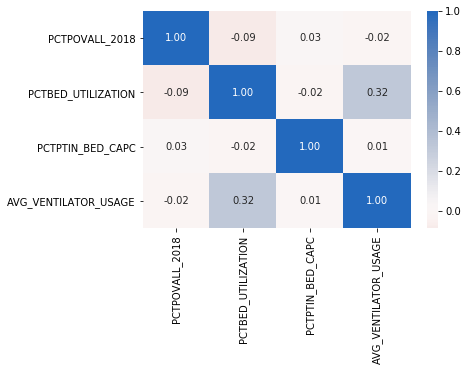

In [287]:
sb.heatmap(beds_poverty_df[['PCTPOVALL_2018', 'PCTBED_UTILIZATION', 'PCTPTIN_BED_CAPC', 'AVG_VENTILATOR_USAGE']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

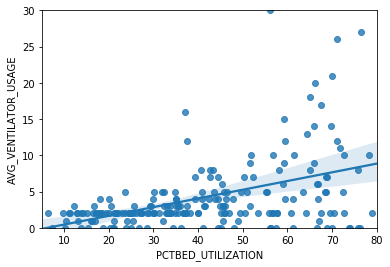

In [290]:
sb.regplot(top_pvt_nonnull['PCTBED_UTILIZATION'], top_pvt_nonnull['AVG_VENTILATOR_USAGE']);
plt.xlim(5,80)
plt.ylim(0, 30);

<Figure size 864x1296 with 0 Axes>

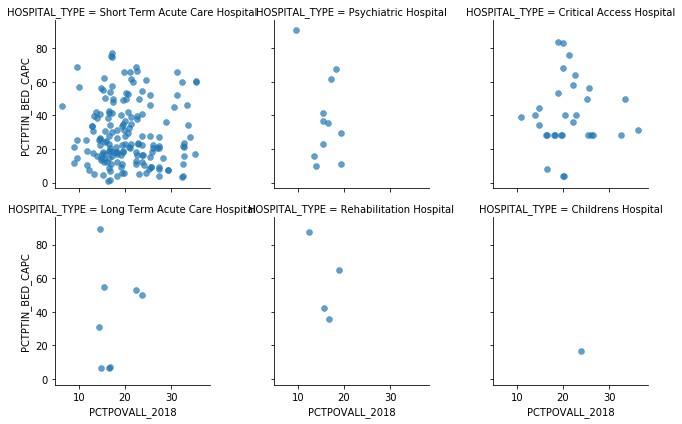

In [295]:
plt.figure(figsize=[12,18])
g = sb.FacetGrid(top_pvt_nonnull, col="HOSPITAL_TYPE", col_wrap=3)
g.map(plt.scatter, "PCTPOVALL_2018", "PCTPTIN_BED_CAPC", alpha=.7, linewidth=.5)
#plt.xlim(25,100)
#plt.ylim(5,200)
g.add_legend()
plt.show();

<Figure size 1008x576 with 0 Axes>

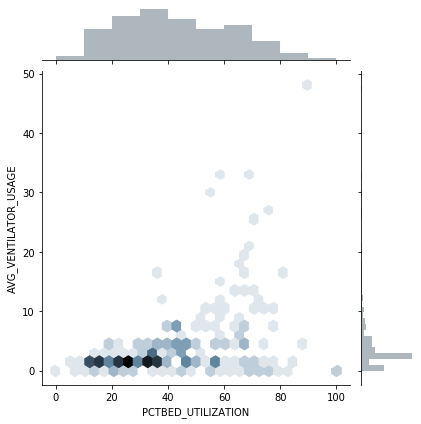

In [319]:
#sb.set_palette("gist_rainbow_r")
plt.figure(figsize=[14,8])
sb.set_palette("Blues_d")
sb.jointplot(x="PCTBED_UTILIZATION", y="AVG_VENTILATOR_USAGE", kind="hex",data=top_pvt_nonnull )
plt.show()

<Figure size 864x576 with 0 Axes>

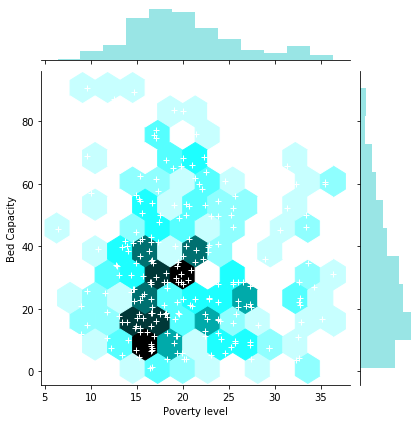

In [311]:
plt.figure(figsize=[12,8])
g = sb.jointplot(x="PCTPOVALL_2018", y="PCTPTIN_BED_CAPC", data=top_pvt_nonnull, kind="hex", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.set_axis_labels("Poverty level", "Bed Capacity")
plt.show();

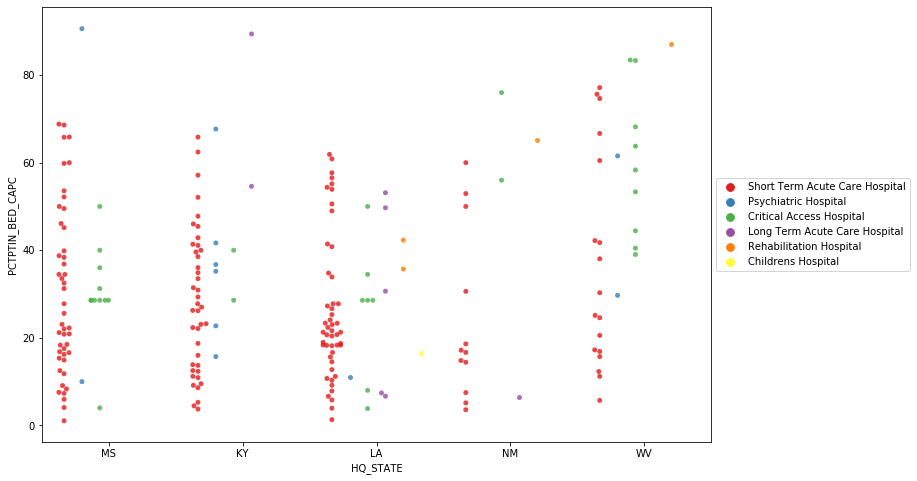

In [308]:
plt.figure(figsize=[12,8])
sb.swarmplot(x="HQ_STATE", y="PCTPTIN_BED_CAPC", hue="HOSPITAL_TYPE",data=top_pvt_nonnull, palette="Set1", dodge=True, alpha=.8)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))
plt.show();

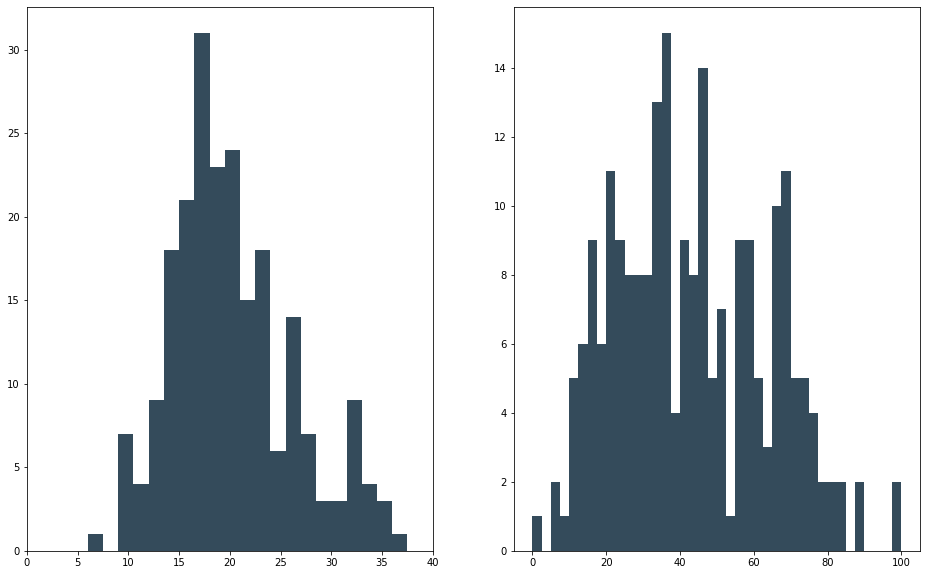

In [321]:
plt.figure(figsize = [16, 10])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, top_pvt_nonnull['PCTPOVALL_2018'].max()+1.5, 1.5)
plt.hist(data = top_pvt_nonnull, x = 'PCTPOVALL_2018', bins = bin_edges)
plt.xlim(0, 40)

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, top_pvt_nonnull['PCTBED_UTILIZATION'].max()+2.5, 2.5)
plt.hist(data = top_pvt_nonnull, x = 'PCTBED_UTILIZATION', bins = bin_edges)
#plt.xlim(0, 35) # could also be called as plt.xlim((0, 35))
plt.show()

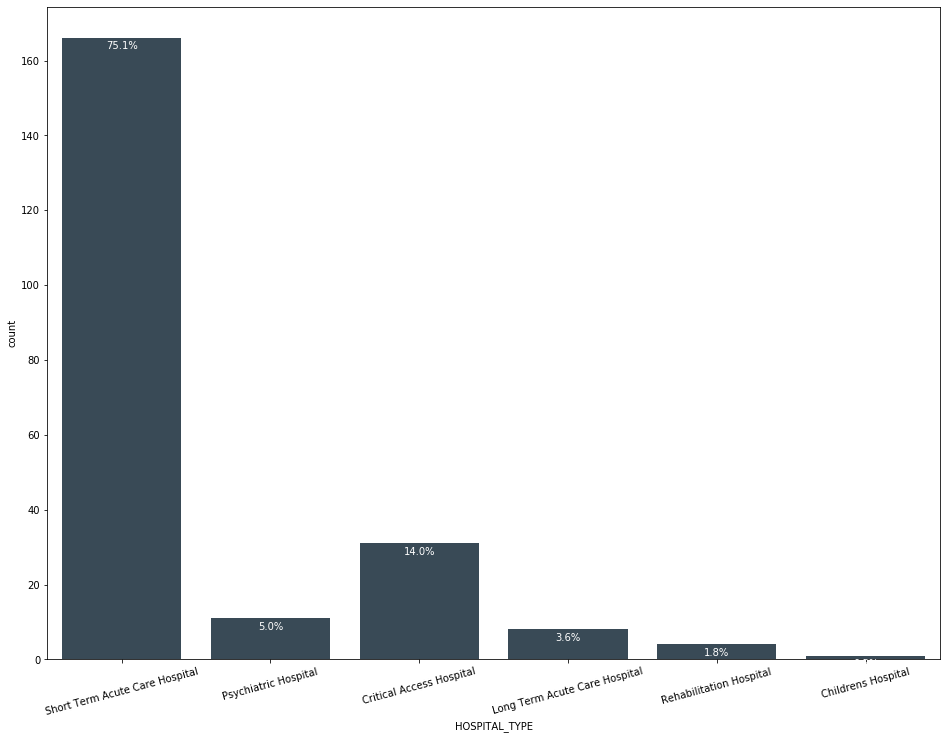

In [324]:
#Question: Which hospitals types are reporting their bed utilizations.
plt.figure(figsize=[16, 12])
#plt.rcParams["figure.figsize"] = [16,9]

base_color = sb.color_palette()[0]
sb.countplot(data=top_pvt_nonnull, x='HOSPITAL_TYPE', color=base_color);

hos_labels = ['Short Term Acute Care', 'Critical Access', 'Psychiatric', 'Long Term Acute Care', 'Rehabilitation', 'Childrens', 'Religious Non-Medical' ]

#ax = plt.gca()
#ax.set_xticklabels(hos_labels)


# add annotations
n_points = top_pvt_nonnull.shape[0]
cat_counts = top_pvt_nonnull['HOSPITAL_TYPE'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.xticks(rotation=15)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-3, pct_string, ha = 'center', color = 'w')

plt.show()

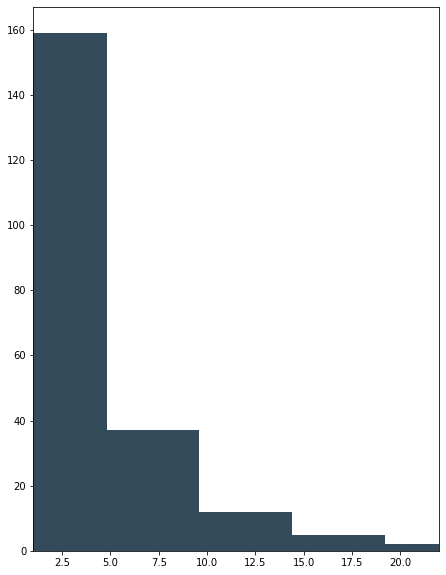

In [332]:
plt.figure(figsize = [16, 10])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, top_pvt_nonnull['AVG_VENTILATOR_USAGE'].max()+2, 2)
plt.hist(data = top_pvt_nonnull, x = 'AVG_VENTILATOR_USAGE')
plt.xlim(1,22)
plt.show();

In [333]:
top_pvt_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 1 to 5831
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   X                                221 non-null    float64
 1   Y                                221 non-null    float64
 2   OBJECTID                         221 non-null    int64  
 3   HOSPITAL_NAME                    221 non-null    object 
 4   HOSPITAL_TYPE                    221 non-null    object 
 5   HQ_ADDRESS                       221 non-null    object 
 6   HQ_ADDRESS1                      221 non-null    object 
 7   HQ_CITY                          221 non-null    object 
 8   HQ_STATE                         221 non-null    object 
 9   HQ_ZIP_CODE                      221 non-null    int64  
 10  COUNTY_NAME                      221 non-null    object 
 11  STATE_NAME                       221 non-null    object 
 12  STATE_FIPS           

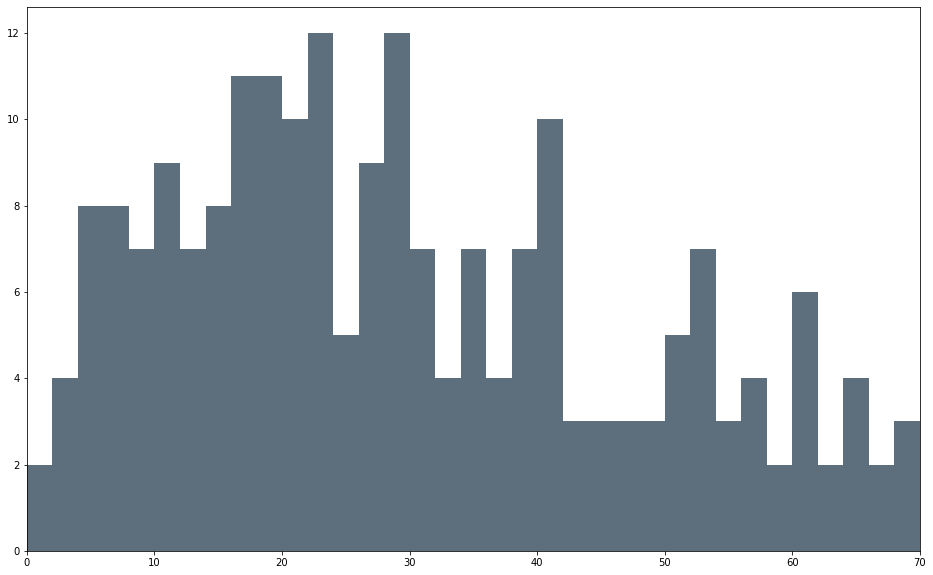

In [354]:
plt.figure(figsize = [16, 10])

# histogram on left: full data
#plt.subplot(1, 2, 1)
bin_edges = np.arange(0, top_pvt_nonnull['PCTPTIN_BED_CAPC'].max()+2, 2)
plt.hist(data = top_pvt_nonnull, x = 'PCTPTIN_BED_CAPC', bins=bin_edges, alpha = 0.8)
plt.ylim(0)
plt.xlim(0,70)
plt.show()

In [344]:
top_pvt_nonnull['PCTPTIN_BED_CAPC'].describe()

count    221.000000
mean      31.691940
std       20.268761
min        1.052632
25%       16.517857
50%       27.777778
75%       44.444444
max       90.601758
Name: PCTPTIN_BED_CAPC, dtype: float64

In [355]:
top_pvt_nonnull.shape[0]

221

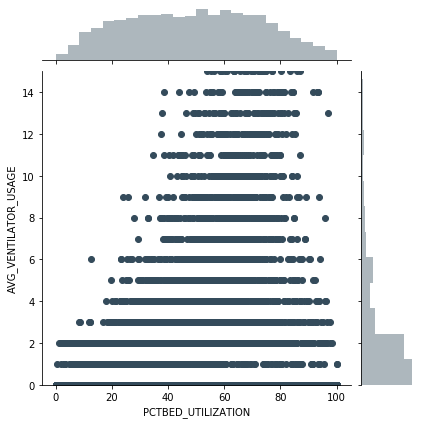

In [363]:
#plt.figure(figsize=[14,8])
sb.set_palette("Blues_d")
sb.jointplot(x="PCTBED_UTILIZATION", y="AVG_VENTILATOR_USAGE", data=beds_poverty_df )
plt.ylim(0,15)
plt.show()

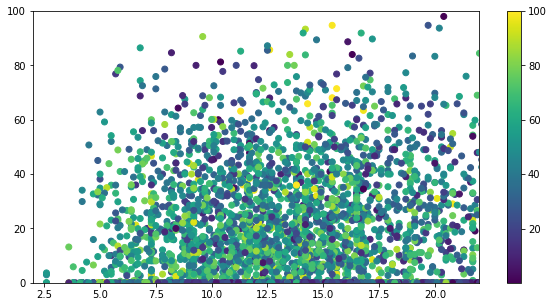

In [371]:
plt.figure(figsize=[10, 5])
plt.scatter(data=beds_poverty_df, x='PCTPOVALL_2018', y='PCTPTIN_BED_CAPC',
            c='PCTBED_UTILIZATION',
            cmap = 'viridis'
            )

plt.xlim(2,22)
plt.ylim(0,100)
plt.colorbar();

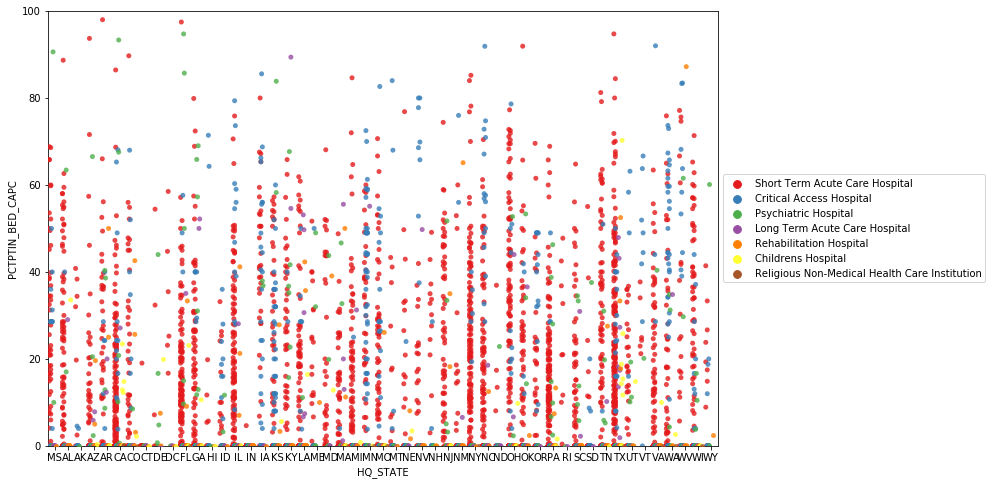

In [374]:
plt.figure(figsize=[12,8])
sb.swarmplot(x="HQ_STATE", y="PCTPTIN_BED_CAPC", hue="HOSPITAL_TYPE",data=beds_poverty_df, palette="Set1", dodge=True, alpha=.8)
plt.ylim(0,100)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))
plt.show();

In [ ]:
sb.regplot(beds_poverty_df['PCTBED_UTILIZATION'], beds_poverty_df['AVG_VENTILATOR_USAGE']);
plt.xlim(5,80)
plt.ylim(0, 30);